# Preprocess

In [2]:
import os
import cv2
import random

from tqdm import tqdm

import skimage
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


voc_folder = '/home/data1/ruofan/VOCdevkit/VOC2012'
voc_img_folder = os.path.join(voc_folder, 'JPEGImages')
voc_anno_folder = os.path.join(voc_folder, 'Annotation')
voc_segobj_folder = os.path.join(voc_folder, 'SegmentationObject')
voc_segclass_folder = os.path.join(voc_folder, 'SegmentationClass')
voc_seg_folder = os.path.join(voc_folder, 'SegmentationClass')

## Take a look of the images

***Note: different `imread` methods has different channel order***

- PIL.Image.open  # RGB
- skimage.io.imread  # RGB
- matplot.image.imread  # RGB
- cv2.imread  # BGR

(500, 347, 3)


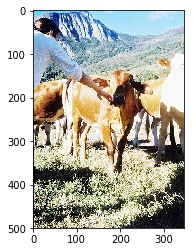

In [3]:
img = mpimg.imread('/home/data1/ruofan/VOCdevkit/VOC2012/JPEGImages/2010_003239.jpg')
plt.imshow(img)
print(img.shape)

/home/data1/ruofan/VOCdevkit/VOC2012/SegmentationObject/2010_003239.png


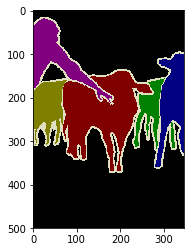

In [4]:
for root, dirs, files in os.walk(voc_segobj_folder):
    file = files[1953]
    path = os.path.join(root, file)
    print(path)
    img = mpimg.imread(path)
    plt.imshow(img)

/home/data1/ruofan/VOCdevkit/VOC2012/SegmentationClass/2010_003239.png


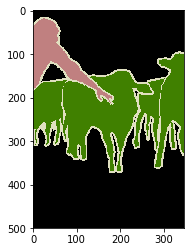

In [5]:
for root, dirs, files in os.walk(voc_segclass_folder):
    file = files[1953]
    path = os.path.join(root, file)
    print(path)
    img = mpimg.imread(path)
    plt.imshow(img)

### What about colors ?

- We have 20 classes, each represented with a kind of color.
- encode(): [r, g, b] -> number between 0 and 20
- decode(): number between 0 and 20 -> [r, g, b]

In [6]:
color_dict = {
    0:[0, 0, 0], 
    1:[128, 0, 0], 
    2:[0, 128, 0], 
    3:[128, 128, 0], 
    4:[0, 0, 128], 
    5:[128, 0, 128],
    6:[0, 128, 128], 
    7:[128, 128, 128], 
    8:[64, 0, 0], 
    9:[192, 0, 0], 
    10:[64, 128, 0],
    11:[192, 128, 0], 
    12:[64, 0, 128], 
    13:[192, 0, 128], 
    14:[64, 128, 128], 
    15:[192, 128, 128],
    16:[0, 64, 0], 
    17:[128, 64, 0], 
    18:[0, 192, 0], 
    19:[128, 192, 0], 
    20:[0, 64, 128]
}

In [7]:
def rgb2int(rgb):
    r, g, b = rgb
    return (r << 16) + (g << 8) + b

def bgr2int(bgr):
    b, g, r = bgr
    return (r << 16) + (g << 8) + b

In [8]:
print('decode_dict = {')
for c in range(len(color_dict)):
    print(f'    {rgb2int(color_dict[c])}: {c},')
print('}')

decode_dict = {
    0: 0,
    8388608: 1,
    32768: 2,
    8421376: 3,
    128: 4,
    8388736: 5,
    32896: 6,
    8421504: 7,
    4194304: 8,
    12582912: 9,
    4227072: 10,
    12615680: 11,
    4194432: 12,
    12583040: 13,
    4227200: 14,
    12615808: 15,
    16384: 16,
    8404992: 17,
    49152: 18,
    8437760: 19,
    16512: 20,
}


In [9]:
encode_dict = {
    0: 0,
    8388608: 1,
    32768: 2,
    8421376: 3,
    128: 4,
    8388736: 5,
    32896: 6,
    8421504: 7,
    4194304: 8,
    12582912: 9,
    4227072: 10,
    12615680: 11,
    4194432: 12,
    12583040: 13,
    4227200: 14,
    12615808: 15,
    16384: 16,
    8404992: 17,
    49152: 18,
    8437760: 19,
    16512: 20,
    
    14737600: 0,  # edge
}

In [10]:
def encode(bgr):
    return encode_dict[bgr2int(bgr)]

def decode(c):
    return color_dict[c]

Test

In [13]:
print(encode([0, 192, 128]))
print(decode(19))

19
[128, 192, 0]


### What about image size?

- They all have different sizes
- Resize them when training

In [14]:
for root, dirs, files in os.walk(voc_img_folder):
    for file in files[:10]:
        path = os.path.join(root, file)
        img = mpimg.imread(path)
        print(f'img:{file}\tshape:{img.shape}')

img:2012_002447.jpg	shape:(375, 500, 3)
img:2009_002615.jpg	shape:(375, 500, 3)
img:2008_005379.jpg	shape:(375, 500, 3)
img:2008_002716.jpg	shape:(375, 500, 3)
img:2012_004285.jpg	shape:(319, 500, 3)
img:2008_000189.jpg	shape:(333, 500, 3)
img:2011_004727.jpg	shape:(500, 375, 3)
img:2009_001260.jpg	shape:(375, 500, 3)
img:2008_005404.jpg	shape:(375, 500, 3)
img:2012_003336.jpg	shape:(500, 357, 3)
img:2008_002484.jpg	shape:(500, 375, 3)
img:2009_001398.jpg	shape:(500, 280, 3)
img:2010_000821.jpg	shape:(375, 500, 3)
img:2009_004974.jpg	shape:(500, 281, 3)
img:2012_000548.jpg	shape:(500, 429, 3)
img:2010_000689.jpg	shape:(333, 500, 3)
img:2008_007586.jpg	shape:(375, 500, 3)
img:2010_001077.jpg	shape:(333, 500, 3)
img:2009_005210.jpg	shape:(333, 500, 3)
img:2009_002285.jpg	shape:(333, 500, 3)
img:2010_002980.jpg	shape:(387, 500, 3)
img:2010_000669.jpg	shape:(375, 500, 3)
img:2008_002372.jpg	shape:(480, 344, 3)
img:2011_003991.jpg	shape:(342, 486, 3)
img:2011_000875.jpg	shape:(375, 500, 3)


img:2009_002704.jpg	shape:(333, 500, 3)
img:2011_001972.jpg	shape:(375, 500, 3)
img:2008_005627.jpg	shape:(375, 500, 3)
img:2012_003736.jpg	shape:(500, 375, 3)
img:2011_000598.jpg	shape:(500, 375, 3)
img:2007_009533.jpg	shape:(375, 500, 3)
img:2008_003181.jpg	shape:(421, 500, 3)
img:2008_007082.jpg	shape:(500, 333, 3)
img:2010_000074.jpg	shape:(351, 500, 3)
img:2011_001360.jpg	shape:(375, 500, 3)
img:2012_001651.jpg	shape:(337, 500, 3)
img:2008_000257.jpg	shape:(500, 334, 3)
img:2009_000367.jpg	shape:(325, 500, 3)
img:2008_006753.jpg	shape:(375, 500, 3)
img:2008_008549.jpg	shape:(375, 500, 3)
img:2011_001655.jpg	shape:(370, 500, 3)
img:2009_002477.jpg	shape:(500, 369, 3)
img:2009_001369.jpg	shape:(461, 480, 3)
img:2011_004596.jpg	shape:(375, 500, 3)
img:2007_002624.jpg	shape:(375, 500, 3)
img:2011_002379.jpg	shape:(375, 500, 3)
img:2008_005463.jpg	shape:(331, 500, 3)
img:2011_002242.jpg	shape:(332, 500, 3)
img:2012_000303.jpg	shape:(375, 500, 3)
img:2008_001699.jpg	shape:(375, 500, 3)


img:2009_002530.jpg	shape:(334, 500, 3)
img:2008_001046.jpg	shape:(375, 500, 3)
img:2011_003791.jpg	shape:(288, 360, 3)
img:2008_000215.jpg	shape:(375, 500, 3)
img:2009_000300.jpg	shape:(333, 500, 3)
img:2010_003481.jpg	shape:(333, 500, 3)
img:2012_003648.jpg	shape:(375, 500, 3)
img:2010_001954.jpg	shape:(333, 500, 3)
img:2011_002191.jpg	shape:(375, 500, 3)
img:2010_005166.jpg	shape:(274, 500, 3)
img:2010_006332.jpg	shape:(375, 500, 3)
img:2009_003613.jpg	shape:(375, 500, 3)
img:2008_003697.jpg	shape:(500, 375, 3)
img:2011_000757.jpg	shape:(375, 500, 3)
img:2011_002676.jpg	shape:(375, 500, 3)
img:2011_001901.jpg	shape:(375, 500, 3)
img:2010_000335.jpg	shape:(333, 500, 3)
img:2011_001381.jpg	shape:(333, 500, 3)
img:2012_002279.jpg	shape:(288, 500, 3)
img:2009_004004.jpg	shape:(375, 500, 3)
img:2007_002967.jpg	shape:(500, 336, 3)
img:2010_000645.jpg	shape:(375, 500, 3)
img:2010_005035.jpg	shape:(332, 500, 3)
img:2011_004377.jpg	shape:(333, 500, 3)
img:2011_000927.jpg	shape:(333, 500, 3)


img:2008_003127.jpg	shape:(500, 374, 3)
img:2009_000651.jpg	shape:(403, 500, 3)
img:2009_001030.jpg	shape:(375, 500, 3)
img:2008_001866.jpg	shape:(333, 500, 3)
img:2011_004969.jpg	shape:(333, 500, 3)
img:2011_003240.jpg	shape:(500, 350, 3)
img:2008_004930.jpg	shape:(375, 500, 3)
img:2011_006854.jpg	shape:(365, 500, 3)
img:2011_005176.jpg	shape:(375, 500, 3)
img:2007_003604.jpg	shape:(375, 500, 3)
img:2012_000364.jpg	shape:(375, 500, 3)
img:2009_000161.jpg	shape:(374, 500, 3)
img:2008_004189.jpg	shape:(375, 500, 3)
img:2011_003019.jpg	shape:(375, 500, 3)
img:2010_001468.jpg	shape:(355, 500, 3)
img:2009_004518.jpg	shape:(500, 375, 3)
img:2009_001084.jpg	shape:(500, 333, 3)
img:2009_001770.jpg	shape:(374, 500, 3)
img:2008_004026.jpg	shape:(500, 335, 3)
img:2008_003463.jpg	shape:(332, 500, 3)
img:2009_002343.jpg	shape:(375, 500, 3)
img:2012_004150.jpg	shape:(335, 500, 3)
img:2008_001937.jpg	shape:(500, 375, 3)
img:2009_000379.jpg	shape:(375, 500, 3)
img:2010_001241.jpg	shape:(500, 375, 3)


img:2008_002255.jpg	shape:(333, 500, 3)
img:2009_001371.jpg	shape:(379, 500, 3)
img:2009_000012.jpg	shape:(292, 418, 3)
img:2008_005032.jpg	shape:(375, 500, 3)
img:2011_000264.jpg	shape:(375, 500, 3)
img:2011_004570.jpg	shape:(500, 333, 3)
img:2009_004285.jpg	shape:(500, 333, 3)
img:2007_007836.jpg	shape:(375, 500, 3)
img:2009_002887.jpg	shape:(243, 500, 3)
img:2012_000616.jpg	shape:(500, 498, 3)
img:2008_004716.jpg	shape:(333, 500, 3)
img:2011_004916.jpg	shape:(333, 500, 3)
img:2012_004043.jpg	shape:(482, 500, 3)
img:2010_002532.jpg	shape:(268, 500, 3)
img:2007_007769.jpg	shape:(500, 375, 3)
img:2008_004814.jpg	shape:(375, 500, 3)
img:2008_001013.jpg	shape:(500, 375, 3)
img:2008_007666.jpg	shape:(375, 500, 3)
img:2012_000265.jpg	shape:(480, 328, 3)
img:2012_004132.jpg	shape:(500, 333, 3)
img:2010_005883.jpg	shape:(500, 333, 3)
img:2011_004709.jpg	shape:(375, 500, 3)
img:2008_007852.jpg	shape:(375, 500, 3)
img:2011_001878.jpg	shape:(375, 500, 3)
img:2010_005005.jpg	shape:(375, 500, 3)


img:2010_001312.jpg	shape:(266, 400, 3)
img:2008_001036.jpg	shape:(333, 500, 3)
img:2008_005739.jpg	shape:(500, 375, 3)
img:2012_003492.jpg	shape:(375, 500, 3)
img:2008_008191.jpg	shape:(333, 500, 3)
img:2011_004335.jpg	shape:(375, 500, 3)
img:2012_001839.jpg	shape:(375, 500, 3)
img:2010_005993.jpg	shape:(356, 500, 3)
img:2007_005428.jpg	shape:(500, 375, 3)
img:2009_003860.jpg	shape:(375, 500, 3)
img:2011_006402.jpg	shape:(375, 500, 3)
img:2010_000473.jpg	shape:(500, 375, 3)
img:2008_003093.jpg	shape:(375, 500, 3)
img:2011_006858.jpg	shape:(498, 500, 3)
img:2010_001074.jpg	shape:(269, 359, 3)
img:2010_006953.jpg	shape:(375, 500, 3)
img:2008_005636.jpg	shape:(300, 400, 3)
img:2009_000566.jpg	shape:(499, 500, 3)
img:2008_006841.jpg	shape:(374, 500, 3)
img:2008_006481.jpg	shape:(303, 500, 3)
img:2011_007161.jpg	shape:(375, 500, 3)
img:2009_000097.jpg	shape:(333, 500, 3)
img:2011_004177.jpg	shape:(500, 295, 3)
img:2008_006027.jpg	shape:(375, 500, 3)
img:2011_003074.jpg	shape:(375, 500, 3)


img:2011_000990.jpg	shape:(375, 500, 3)
img:2011_003294.jpg	shape:(375, 500, 3)
img:2009_002983.jpg	shape:(375, 500, 3)
img:2011_005185.jpg	shape:(375, 500, 3)
img:2008_007870.jpg	shape:(333, 500, 3)
img:2008_004455.jpg	shape:(251, 341, 3)
img:2011_006072.jpg	shape:(348, 500, 3)
img:2008_002817.jpg	shape:(375, 500, 3)
img:2008_005319.jpg	shape:(375, 500, 3)
img:2011_004358.jpg	shape:(500, 333, 3)
img:2011_001341.jpg	shape:(330, 500, 3)
img:2012_000171.jpg	shape:(375, 500, 3)
img:2009_000939.jpg	shape:(333, 500, 3)
img:2008_006273.jpg	shape:(375, 500, 3)
img:2010_002047.jpg	shape:(500, 375, 3)
img:2012_004232.jpg	shape:(375, 500, 3)
img:2012_001472.jpg	shape:(500, 375, 3)
img:2008_007597.jpg	shape:(500, 369, 3)
img:2009_004983.jpg	shape:(500, 375, 3)
img:2009_001117.jpg	shape:(499, 500, 3)
img:2009_001075.jpg	shape:(375, 500, 3)
img:2011_005365.jpg	shape:(500, 333, 3)
img:2007_008816.jpg	shape:(375, 500, 3)
img:2012_003025.jpg	shape:(333, 500, 3)
img:2007_007878.jpg	shape:(500, 375, 3)


img:2010_005827.jpg	shape:(375, 500, 3)
img:2008_001680.jpg	shape:(400, 500, 3)
img:2011_005556.jpg	shape:(375, 500, 3)
img:2009_002127.jpg	shape:(500, 334, 3)
img:2010_005239.jpg	shape:(500, 375, 3)
img:2010_000484.jpg	shape:(500, 333, 3)
img:2012_002162.jpg	shape:(330, 500, 3)
img:2011_005519.jpg	shape:(375, 500, 3)
img:2008_004245.jpg	shape:(500, 375, 3)
img:2009_004868.jpg	shape:(375, 500, 3)
img:2011_004966.jpg	shape:(374, 500, 3)
img:2008_004984.jpg	shape:(375, 500, 3)
img:2011_002871.jpg	shape:(248, 500, 3)
img:2008_007344.jpg	shape:(375, 500, 3)
img:2008_005477.jpg	shape:(500, 333, 3)
img:2010_000617.jpg	shape:(375, 500, 3)
img:2008_006159.jpg	shape:(375, 500, 3)
img:2010_004529.jpg	shape:(333, 500, 3)
img:2011_002075.jpg	shape:(375, 500, 3)
img:2012_002575.jpg	shape:(318, 500, 3)
img:2011_007018.jpg	shape:(500, 333, 3)
img:2010_002642.jpg	shape:(375, 500, 3)
img:2009_003074.jpg	shape:(375, 500, 3)
img:2011_006237.jpg	shape:(500, 500, 3)
img:2008_004439.jpg	shape:(375, 500, 3)


img:2011_003305.jpg	shape:(375, 500, 3)
img:2010_000797.jpg	shape:(375, 500, 3)
img:2010_004971.jpg	shape:(362, 500, 3)
img:2009_002579.jpg	shape:(500, 375, 3)
img:2008_002182.jpg	shape:(375, 500, 3)
img:2011_005371.jpg	shape:(375, 500, 3)
img:2009_002932.jpg	shape:(375, 500, 3)
img:2012_000491.jpg	shape:(334, 500, 3)
img:2009_002192.jpg	shape:(375, 500, 3)
img:2012_003354.jpg	shape:(375, 500, 3)
img:2011_006102.jpg	shape:(375, 500, 3)
img:2008_006200.jpg	shape:(333, 500, 3)
img:2011_001698.jpg	shape:(333, 500, 3)
img:2012_003725.jpg	shape:(500, 375, 3)
img:2009_003982.jpg	shape:(500, 431, 3)
img:2008_007736.jpg	shape:(375, 500, 3)
img:2009_002387.jpg	shape:(305, 500, 3)
img:2007_009649.jpg	shape:(375, 500, 3)
img:2012_001027.jpg	shape:(375, 500, 3)
img:2011_005624.jpg	shape:(375, 500, 3)
img:2009_001148.jpg	shape:(376, 500, 3)
img:2010_004533.jpg	shape:(375, 500, 3)
img:2008_000426.jpg	shape:(332, 500, 3)
img:2012_003142.jpg	shape:(414, 500, 3)
img:2011_006184.jpg	shape:(500, 324, 3)


img:2007_001377.jpg	shape:(366, 500, 3)
img:2010_004560.jpg	shape:(375, 500, 3)
img:2009_001385.jpg	shape:(332, 500, 3)
img:2008_006434.jpg	shape:(333, 500, 3)
img:2010_000141.jpg	shape:(500, 371, 3)
img:2011_003980.jpg	shape:(500, 376, 3)
img:2011_006535.jpg	shape:(375, 500, 3)
img:2008_006973.jpg	shape:(333, 500, 3)
img:2009_004519.jpg	shape:(336, 448, 3)
img:2011_001030.jpg	shape:(500, 375, 3)
img:2012_003878.jpg	shape:(500, 332, 3)
img:2009_000910.jpg	shape:(328, 500, 3)
img:2008_005891.jpg	shape:(333, 500, 3)
img:2010_001788.jpg	shape:(375, 500, 3)
img:2012_002878.jpg	shape:(449, 500, 3)
img:2010_004656.jpg	shape:(500, 489, 3)
img:2009_003837.jpg	shape:(333, 500, 3)
img:2010_004124.jpg	shape:(500, 375, 3)
img:2012_004178.jpg	shape:(375, 500, 3)
img:2011_002656.jpg	shape:(336, 448, 3)
img:2009_004961.jpg	shape:(334, 500, 3)
img:2008_007058.jpg	shape:(334, 500, 3)
img:2010_001002.jpg	shape:(375, 500, 3)
img:2008_004235.jpg	shape:(355, 500, 3)
img:2008_007945.jpg	shape:(361, 500, 3)


img:2011_005056.jpg	shape:(375, 500, 3)
img:2008_001351.jpg	shape:(500, 493, 3)
img:2008_002404.jpg	shape:(333, 500, 3)
img:2009_004557.jpg	shape:(500, 375, 3)
img:2010_003380.jpg	shape:(500, 375, 3)
img:2012_002628.jpg	shape:(375, 500, 3)
img:2011_004652.jpg	shape:(500, 375, 3)
img:2011_002072.jpg	shape:(290, 500, 3)
img:2007_009899.jpg	shape:(375, 500, 3)
img:2011_005269.jpg	shape:(375, 500, 3)
img:2012_003341.jpg	shape:(234, 400, 3)
img:2008_001503.jpg	shape:(333, 500, 3)
img:2010_002752.jpg	shape:(375, 500, 3)
img:2010_004072.jpg	shape:(500, 364, 3)
img:2011_003255.jpg	shape:(375, 500, 3)
img:2008_007758.jpg	shape:(375, 500, 3)
img:2007_002953.jpg	shape:(370, 500, 3)
img:2010_002737.jpg	shape:(382, 500, 3)
img:2012_000877.jpg	shape:(386, 400, 3)
img:2010_004060.jpg	shape:(500, 368, 3)
img:2012_000122.jpg	shape:(357, 500, 3)
img:2010_006762.jpg	shape:(332, 500, 3)
img:2010_006639.jpg	shape:(333, 500, 3)
img:2009_005144.jpg	shape:(334, 500, 3)
img:2009_002833.jpg	shape:(333, 500, 3)


img:2010_000469.jpg	shape:(379, 500, 3)
img:2010_003458.jpg	shape:(401, 500, 3)
img:2008_008432.jpg	shape:(375, 500, 3)
img:2009_003010.jpg	shape:(331, 500, 3)
img:2011_000745.jpg	shape:(375, 500, 3)
img:2010_001771.jpg	shape:(297, 480, 3)
img:2012_000132.jpg	shape:(375, 500, 3)
img:2012_000860.jpg	shape:(375, 500, 3)
img:2012_003083.jpg	shape:(375, 500, 3)
img:2011_005533.jpg	shape:(500, 334, 3)
img:2012_003431.jpg	shape:(375, 500, 3)
img:2009_001779.jpg	shape:(500, 334, 3)
img:2009_002673.jpg	shape:(375, 500, 3)
img:2011_006359.jpg	shape:(375, 500, 3)
img:2012_001366.jpg	shape:(375, 500, 3)
img:2008_000540.jpg	shape:(375, 500, 3)
img:2010_006102.jpg	shape:(375, 500, 3)
img:2009_002268.jpg	shape:(500, 333, 3)
img:2009_003345.jpg	shape:(375, 500, 3)
img:2009_004921.jpg	shape:(360, 288, 3)
img:2010_002152.jpg	shape:(375, 500, 3)
img:2008_007064.jpg	shape:(337, 500, 3)
img:2007_008964.jpg	shape:(333, 500, 3)
img:2008_002730.jpg	shape:(258, 200, 3)
img:2011_005806.jpg	shape:(500, 376, 3)


img:2011_001502.jpg	shape:(375, 500, 3)
img:2011_004473.jpg	shape:(333, 500, 3)
img:2008_005175.jpg	shape:(379, 500, 3)
img:2010_004123.jpg	shape:(334, 500, 3)
img:2012_003191.jpg	shape:(375, 500, 3)
img:2010_004149.jpg	shape:(328, 500, 3)
img:2011_003591.jpg	shape:(320, 212, 3)
img:2011_003580.jpg	shape:(375, 500, 3)
img:2010_005815.jpg	shape:(327, 500, 3)
img:2011_006823.jpg	shape:(500, 375, 3)
img:2009_003214.jpg	shape:(375, 500, 3)
img:2010_006231.jpg	shape:(500, 293, 3)
img:2008_003213.jpg	shape:(300, 400, 3)
img:2010_006114.jpg	shape:(375, 500, 3)
img:2012_002406.jpg	shape:(332, 500, 3)
img:2011_005259.jpg	shape:(332, 500, 3)
img:2012_004248.jpg	shape:(333, 500, 3)
img:2011_006092.jpg	shape:(375, 500, 3)
img:2008_001691.jpg	shape:(375, 500, 3)
img:2011_006910.jpg	shape:(500, 333, 3)
img:2010_002320.jpg	shape:(418, 500, 3)
img:2011_003212.jpg	shape:(375, 500, 3)
img:2010_005425.jpg	shape:(375, 500, 3)
img:2010_002856.jpg	shape:(500, 463, 3)
img:2008_003974.jpg	shape:(500, 500, 3)


img:2011_003674.jpg	shape:(333, 500, 3)
img:2007_005281.jpg	shape:(500, 330, 3)
img:2011_006685.jpg	shape:(300, 400, 3)
img:2012_001629.jpg	shape:(500, 374, 3)
img:2008_003261.jpg	shape:(333, 500, 3)
img:2010_004509.jpg	shape:(333, 500, 3)
img:2008_001751.jpg	shape:(375, 500, 3)
img:2008_007324.jpg	shape:(375, 500, 3)
img:2009_001138.jpg	shape:(375, 500, 3)
img:2012_002530.jpg	shape:(375, 500, 3)
img:2010_003956.jpg	shape:(375, 500, 3)
img:2007_003194.jpg	shape:(333, 500, 3)
img:2011_004768.jpg	shape:(333, 500, 3)
img:2009_004108.jpg	shape:(333, 500, 3)
img:2012_002242.jpg	shape:(375, 500, 3)
img:2009_002256.jpg	shape:(333, 500, 3)
img:2011_007041.jpg	shape:(500, 333, 3)
img:2010_003251.jpg	shape:(375, 500, 3)
img:2011_005248.jpg	shape:(500, 333, 3)
img:2010_003169.jpg	shape:(375, 500, 3)
img:2009_002933.jpg	shape:(375, 500, 3)
img:2012_003115.jpg	shape:(375, 500, 3)
img:2011_004425.jpg	shape:(360, 480, 3)
img:2011_001508.jpg	shape:(375, 500, 3)
img:2009_001411.jpg	shape:(375, 500, 3)


img:2009_000635.jpg	shape:(375, 500, 3)
img:2008_002549.jpg	shape:(338, 450, 3)
img:2012_002789.jpg	shape:(375, 500, 3)
img:2012_001224.jpg	shape:(500, 386, 3)
img:2009_004410.jpg	shape:(375, 500, 3)
img:2010_004197.jpg	shape:(333, 500, 3)
img:2010_002458.jpg	shape:(338, 500, 3)
img:2010_000437.jpg	shape:(335, 500, 3)
img:2009_001321.jpg	shape:(333, 500, 3)
img:2011_002034.jpg	shape:(334, 500, 3)
img:2010_001557.jpg	shape:(500, 375, 3)
img:2012_003172.jpg	shape:(375, 500, 3)
img:2011_000288.jpg	shape:(500, 375, 3)
img:2011_006549.jpg	shape:(375, 500, 3)
img:2007_004281.jpg	shape:(375, 500, 3)
img:2012_001209.jpg	shape:(481, 500, 3)
img:2010_005936.jpg	shape:(375, 500, 3)
img:2009_004392.jpg	shape:(333, 500, 3)
img:2009_001192.jpg	shape:(333, 500, 3)
img:2008_008315.jpg	shape:(482, 500, 3)
img:2008_006014.jpg	shape:(375, 500, 3)
img:2007_003848.jpg	shape:(176, 500, 3)
img:2009_002152.jpg	shape:(375, 500, 3)
img:2010_005543.jpg	shape:(500, 333, 3)
img:2010_005784.jpg	shape:(260, 318, 3)


img:2010_002469.jpg	shape:(375, 500, 3)
img:2008_000899.jpg	shape:(500, 415, 3)
img:2009_000298.jpg	shape:(500, 335, 3)
img:2008_002293.jpg	shape:(375, 500, 3)
img:2011_002132.jpg	shape:(333, 500, 3)
img:2009_005131.jpg	shape:(500, 374, 3)
img:2008_003988.jpg	shape:(375, 500, 3)
img:2011_001281.jpg	shape:(375, 500, 3)
img:2009_001931.jpg	shape:(500, 333, 3)
img:2012_001347.jpg	shape:(375, 500, 3)
img:2011_001034.jpg	shape:(375, 500, 3)
img:2011_005860.jpg	shape:(375, 500, 3)
img:2009_000979.jpg	shape:(375, 500, 3)
img:2010_000970.jpg	shape:(375, 500, 3)
img:2012_003468.jpg	shape:(500, 375, 3)
img:2008_003593.jpg	shape:(500, 375, 3)
img:2009_000915.jpg	shape:(375, 500, 3)
img:2009_004092.jpg	shape:(375, 500, 3)
img:2011_006648.jpg	shape:(333, 500, 3)
img:2012_001904.jpg	shape:(500, 375, 3)
img:2011_004556.jpg	shape:(500, 500, 3)
img:2010_000792.jpg	shape:(375, 500, 3)
img:2012_001131.jpg	shape:(375, 500, 3)
img:2012_003877.jpg	shape:(375, 500, 3)
img:2008_004574.jpg	shape:(375, 500, 3)


img:2008_002347.jpg	shape:(500, 439, 3)
img:2011_004157.jpg	shape:(333, 500, 3)
img:2010_005365.jpg	shape:(375, 500, 3)
img:2007_000664.jpg	shape:(375, 500, 3)
img:2008_005137.jpg	shape:(375, 500, 3)
img:2010_006921.jpg	shape:(331, 500, 3)
img:2010_005141.jpg	shape:(375, 500, 3)
img:2012_001650.jpg	shape:(500, 369, 3)
img:2010_002577.jpg	shape:(331, 500, 3)
img:2012_002104.jpg	shape:(349, 500, 3)
img:2009_004877.jpg	shape:(331, 500, 3)
img:2012_002251.jpg	shape:(375, 500, 3)
img:2009_002112.jpg	shape:(333, 500, 3)
img:2009_004899.jpg	shape:(375, 500, 3)
img:2008_003168.jpg	shape:(500, 375, 3)
img:2010_000490.jpg	shape:(375, 500, 3)
img:2008_006282.jpg	shape:(375, 500, 3)
img:2011_005397.jpg	shape:(329, 500, 3)
img:2012_000998.jpg	shape:(375, 500, 3)
img:2010_006540.jpg	shape:(375, 500, 3)
img:2010_003321.jpg	shape:(360, 480, 3)
img:2008_006390.jpg	shape:(376, 500, 3)
img:2008_002913.jpg	shape:(400, 500, 3)
img:2010_000089.jpg	shape:(375, 500, 3)
img:2010_000526.jpg	shape:(375, 500, 3)


img:2008_005652.jpg	shape:(333, 500, 3)
img:2010_005028.jpg	shape:(385, 500, 3)
img:2010_003390.jpg	shape:(500, 500, 3)
img:2011_006843.jpg	shape:(375, 500, 3)
img:2008_006999.jpg	shape:(405, 500, 3)
img:2011_000829.jpg	shape:(398, 500, 3)
img:2010_005826.jpg	shape:(375, 500, 3)
img:2010_006955.jpg	shape:(500, 376, 3)
img:2011_000291.jpg	shape:(375, 500, 3)
img:2010_006907.jpg	shape:(500, 333, 3)
img:2010_004096.jpg	shape:(332, 500, 3)
img:2011_000950.jpg	shape:(375, 500, 3)
img:2012_001405.jpg	shape:(342, 500, 3)
img:2009_000896.jpg	shape:(375, 500, 3)
img:2009_004169.jpg	shape:(407, 500, 3)
img:2009_002684.jpg	shape:(500, 333, 3)
img:2012_000676.jpg	shape:(500, 375, 3)
img:2008_003589.jpg	shape:(375, 500, 3)
img:2009_000418.jpg	shape:(429, 500, 3)
img:2012_003657.jpg	shape:(375, 500, 3)
img:2010_006003.jpg	shape:(375, 500, 3)
img:2008_003100.jpg	shape:(340, 500, 3)
img:2008_002859.jpg	shape:(375, 500, 3)
img:2012_000821.jpg	shape:(375, 500, 3)
img:2009_000897.jpg	shape:(447, 500, 3)


img:2010_001536.jpg	shape:(375, 500, 3)
img:2009_004913.jpg	shape:(333, 500, 3)
img:2007_006946.jpg	shape:(333, 500, 3)
img:2007_009684.jpg	shape:(375, 500, 3)
img:2011_006676.jpg	shape:(375, 500, 3)
img:2008_000419.jpg	shape:(375, 500, 3)
img:2008_002970.jpg	shape:(500, 421, 3)
img:2011_005577.jpg	shape:(333, 500, 3)
img:2012_003528.jpg	shape:(334, 500, 3)
img:2008_002679.jpg	shape:(500, 333, 3)
img:2012_001540.jpg	shape:(317, 477, 3)
img:2008_008685.jpg	shape:(375, 500, 3)
img:2010_003183.jpg	shape:(375, 500, 3)
img:2008_002172.jpg	shape:(302, 500, 3)
img:2008_000213.jpg	shape:(333, 500, 3)
img:2008_005511.jpg	shape:(500, 334, 3)
img:2009_002088.jpg	shape:(375, 500, 3)
img:2011_004657.jpg	shape:(500, 410, 3)
img:2010_004577.jpg	shape:(375, 500, 3)
img:2008_004995.jpg	shape:(333, 500, 3)
img:2011_001560.jpg	shape:(375, 500, 3)
img:2009_002876.jpg	shape:(375, 500, 3)
img:2009_000286.jpg	shape:(500, 375, 3)
img:2008_005933.jpg	shape:(300, 400, 3)
img:2010_005426.jpg	shape:(420, 500, 3)


img:2008_002067.jpg	shape:(375, 500, 3)
img:2009_004822.jpg	shape:(375, 500, 3)
img:2010_005224.jpg	shape:(500, 349, 3)
img:2009_002505.jpg	shape:(375, 500, 3)
img:2011_006511.jpg	shape:(320, 240, 3)
img:2011_006394.jpg	shape:(333, 500, 3)
img:2009_000586.jpg	shape:(500, 375, 3)
img:2008_005415.jpg	shape:(375, 500, 3)
img:2012_004037.jpg	shape:(375, 500, 3)
img:2012_000811.jpg	shape:(500, 375, 3)
img:2011_002677.jpg	shape:(375, 500, 3)
img:2008_000378.jpg	shape:(333, 500, 3)
img:2012_001346.jpg	shape:(500, 357, 3)
img:2008_003830.jpg	shape:(234, 300, 3)
img:2010_002905.jpg	shape:(500, 375, 3)
img:2011_000865.jpg	shape:(375, 500, 3)
img:2010_000534.jpg	shape:(333, 500, 3)
img:2010_002357.jpg	shape:(333, 500, 3)
img:2011_005975.jpg	shape:(375, 500, 3)
img:2009_004513.jpg	shape:(500, 335, 3)
img:2012_004104.jpg	shape:(500, 496, 3)
img:2008_001161.jpg	shape:(333, 500, 3)
img:2008_006570.jpg	shape:(500, 375, 3)
img:2008_001376.jpg	shape:(333, 500, 3)
img:2009_000028.jpg	shape:(333, 500, 3)


img:2009_001615.jpg	shape:(375, 500, 3)
img:2010_000968.jpg	shape:(375, 500, 3)
img:2007_000452.jpg	shape:(375, 500, 3)
img:2012_003716.jpg	shape:(227, 450, 3)
img:2010_006535.jpg	shape:(442, 379, 3)
img:2008_003095.jpg	shape:(351, 500, 3)
img:2011_001336.jpg	shape:(375, 500, 3)
img:2009_004694.jpg	shape:(356, 500, 3)
img:2007_005107.jpg	shape:(375, 500, 3)
img:2010_002720.jpg	shape:(328, 500, 3)
img:2009_005064.jpg	shape:(354, 500, 3)
img:2008_007928.jpg	shape:(375, 500, 3)
img:2009_000862.jpg	shape:(375, 500, 3)
img:2009_002009.jpg	shape:(333, 500, 3)
img:2011_001173.jpg	shape:(375, 500, 3)
img:2012_001653.jpg	shape:(375, 500, 3)
img:2012_000691.jpg	shape:(375, 500, 3)
img:2012_003227.jpg	shape:(500, 375, 3)
img:2008_004605.jpg	shape:(327, 500, 3)
img:2012_000390.jpg	shape:(375, 500, 3)
img:2012_000765.jpg	shape:(336, 500, 3)
img:2008_005628.jpg	shape:(333, 500, 3)
img:2012_001663.jpg	shape:(500, 315, 3)
img:2010_005429.jpg	shape:(332, 500, 3)
img:2010_001929.jpg	shape:(375, 500, 3)


img:2012_000786.jpg	shape:(375, 500, 3)
img:2011_004412.jpg	shape:(333, 500, 3)
img:2008_005544.jpg	shape:(375, 500, 3)
img:2008_003209.jpg	shape:(500, 333, 3)
img:2008_001553.jpg	shape:(332, 500, 3)
img:2009_003151.jpg	shape:(375, 500, 3)
img:2009_004556.jpg	shape:(333, 500, 3)
img:2011_001193.jpg	shape:(375, 500, 3)
img:2008_003295.jpg	shape:(374, 500, 3)
img:2011_004369.jpg	shape:(335, 500, 3)
img:2008_004171.jpg	shape:(500, 375, 3)
img:2009_005218.jpg	shape:(375, 500, 3)
img:2010_005258.jpg	shape:(375, 500, 3)
img:2009_000087.jpg	shape:(455, 500, 3)
img:2011_006645.jpg	shape:(500, 384, 3)
img:2012_003288.jpg	shape:(334, 500, 3)
img:2008_006341.jpg	shape:(375, 500, 3)
img:2008_005705.jpg	shape:(375, 500, 3)
img:2011_002041.jpg	shape:(333, 500, 3)
img:2009_002107.jpg	shape:(375, 500, 3)
img:2010_004812.jpg	shape:(347, 500, 3)
img:2009_002298.jpg	shape:(313, 500, 3)
img:2009_001475.jpg	shape:(332, 500, 3)
img:2010_003847.jpg	shape:(375, 500, 3)
img:2008_007682.jpg	shape:(375, 500, 3)


img:2011_000780.jpg	shape:(500, 375, 3)
img:2009_002358.jpg	shape:(375, 500, 3)
img:2011_005331.jpg	shape:(500, 332, 3)
img:2011_005039.jpg	shape:(500, 333, 3)
img:2008_002001.jpg	shape:(375, 500, 3)
img:2010_001179.jpg	shape:(375, 500, 3)
img:2009_004647.jpg	shape:(333, 500, 3)
img:2009_001372.jpg	shape:(229, 500, 3)
img:2011_003432.jpg	shape:(500, 333, 3)
img:2008_004892.jpg	shape:(322, 500, 3)
img:2011_005558.jpg	shape:(456, 500, 3)
img:2009_000777.jpg	shape:(375, 500, 3)
img:2012_004192.jpg	shape:(360, 480, 3)
img:2011_005726.jpg	shape:(375, 500, 3)
img:2009_001705.jpg	shape:(375, 500, 3)
img:2012_003813.jpg	shape:(379, 500, 3)
img:2010_005273.jpg	shape:(375, 500, 3)
img:2012_001262.jpg	shape:(333, 500, 3)
img:2012_001935.jpg	shape:(375, 500, 3)
img:2009_001271.jpg	shape:(375, 500, 3)
img:2009_005165.jpg	shape:(500, 375, 3)
img:2010_004242.jpg	shape:(387, 500, 3)
img:2010_004877.jpg	shape:(381, 500, 3)
img:2012_002718.jpg	shape:(375, 500, 3)
img:2010_003632.jpg	shape:(375, 500, 3)


img:2010_003437.jpg	shape:(400, 500, 3)
img:2011_004452.jpg	shape:(375, 500, 3)
img:2010_003082.jpg	shape:(500, 375, 3)
img:2011_002385.jpg	shape:(375, 500, 3)
img:2010_006079.jpg	shape:(375, 500, 3)
img:2009_005193.jpg	shape:(375, 500, 3)
img:2010_000323.jpg	shape:(375, 500, 3)
img:2011_002047.jpg	shape:(333, 500, 3)
img:2009_003588.jpg	shape:(500, 391, 3)
img:2010_004373.jpg	shape:(333, 500, 3)
img:2011_000790.jpg	shape:(375, 500, 3)
img:2012_003305.jpg	shape:(375, 500, 3)
img:2008_008206.jpg	shape:(325, 500, 3)
img:2008_005812.jpg	shape:(375, 500, 3)
img:2010_001731.jpg	shape:(500, 500, 3)
img:2010_005591.jpg	shape:(500, 500, 3)
img:2010_002831.jpg	shape:(375, 500, 3)
img:2010_006357.jpg	shape:(375, 500, 3)
img:2008_001358.jpg	shape:(338, 500, 3)
img:2009_003855.jpg	shape:(333, 500, 3)
img:2011_006425.jpg	shape:(375, 500, 3)
img:2011_004730.jpg	shape:(375, 500, 3)
img:2010_003279.jpg	shape:(250, 500, 3)
img:2012_001081.jpg	shape:(333, 500, 3)
img:2009_004125.jpg	shape:(375, 500, 3)


img:2008_003083.jpg	shape:(375, 500, 3)
img:2010_000608.jpg	shape:(413, 500, 3)
img:2008_004838.jpg	shape:(375, 500, 3)
img:2011_002360.jpg	shape:(393, 500, 3)
img:2009_003352.jpg	shape:(333, 500, 3)
img:2008_005976.jpg	shape:(357, 500, 3)
img:2011_005916.jpg	shape:(500, 374, 3)
img:2011_007119.jpg	shape:(445, 500, 3)
img:2010_003736.jpg	shape:(375, 500, 3)
img:2009_003409.jpg	shape:(335, 500, 3)
img:2009_004062.jpg	shape:(375, 500, 3)
img:2008_007410.jpg	shape:(375, 500, 3)
img:2009_004560.jpg	shape:(375, 500, 3)
img:2007_000464.jpg	shape:(500, 375, 3)
img:2008_001909.jpg	shape:(500, 375, 3)
img:2012_003097.jpg	shape:(500, 333, 3)
img:2010_006394.jpg	shape:(350, 473, 3)
img:2010_000485.jpg	shape:(500, 339, 3)
img:2008_001048.jpg	shape:(375, 500, 3)
img:2010_000761.jpg	shape:(333, 500, 3)
img:2012_001605.jpg	shape:(375, 500, 3)
img:2010_000503.jpg	shape:(375, 500, 3)
img:2008_001024.jpg	shape:(333, 500, 3)
img:2012_001198.jpg	shape:(368, 500, 3)
img:2010_004793.jpg	shape:(375, 500, 3)


img:2009_000471.jpg	shape:(333, 500, 3)
img:2012_003314.jpg	shape:(375, 500, 3)
img:2009_003000.jpg	shape:(336, 500, 3)
img:2008_002756.jpg	shape:(472, 380, 3)
img:2009_002763.jpg	shape:(375, 500, 3)
img:2008_008257.jpg	shape:(375, 500, 3)
img:2010_000857.jpg	shape:(500, 330, 3)
img:2011_000788.jpg	shape:(369, 500, 3)
img:2009_000770.jpg	shape:(454, 500, 3)
img:2011_006054.jpg	shape:(500, 346, 3)
img:2008_006195.jpg	shape:(500, 375, 3)
img:2007_006240.jpg	shape:(467, 351, 3)
img:2011_006806.jpg	shape:(375, 500, 3)
img:2009_000059.jpg	shape:(335, 500, 3)
img:2009_000828.jpg	shape:(339, 500, 3)
img:2012_001389.jpg	shape:(500, 375, 3)
img:2009_003863.jpg	shape:(333, 500, 3)
img:2011_001015.jpg	shape:(375, 500, 3)
img:2008_004138.jpg	shape:(375, 500, 3)
img:2010_002907.jpg	shape:(414, 500, 3)
img:2009_003549.jpg	shape:(284, 500, 3)
img:2010_005876.jpg	shape:(375, 500, 3)
img:2009_003282.jpg	shape:(500, 375, 3)
img:2008_004648.jpg	shape:(333, 500, 3)
img:2011_001211.jpg	shape:(500, 351, 3)


img:2008_001147.jpg	shape:(334, 500, 3)
img:2011_000129.jpg	shape:(333, 500, 3)
img:2008_005521.jpg	shape:(375, 500, 3)
img:2008_001980.jpg	shape:(390, 312, 3)
img:2007_000572.jpg	shape:(331, 500, 3)
img:2010_005501.jpg	shape:(375, 500, 3)
img:2011_004080.jpg	shape:(500, 428, 3)
img:2010_006618.jpg	shape:(375, 500, 3)
img:2012_004189.jpg	shape:(333, 500, 3)
img:2010_002822.jpg	shape:(500, 333, 3)
img:2008_007904.jpg	shape:(500, 213, 3)
img:2010_005559.jpg	shape:(333, 500, 3)
img:2008_002551.jpg	shape:(375, 500, 3)
img:2010_000994.jpg	shape:(333, 500, 3)
img:2009_000539.jpg	shape:(333, 500, 3)
img:2008_005146.jpg	shape:(375, 500, 3)
img:2011_001036.jpg	shape:(375, 500, 3)
img:2009_002744.jpg	shape:(375, 500, 3)
img:2012_002474.jpg	shape:(375, 500, 3)
img:2007_005813.jpg	shape:(500, 335, 3)
img:2010_000264.jpg	shape:(500, 332, 3)
img:2009_003815.jpg	shape:(374, 500, 3)
img:2011_005998.jpg	shape:(333, 500, 3)
img:2007_009910.jpg	shape:(500, 321, 3)
img:2011_005410.jpg	shape:(375, 500, 3)


img:2008_004908.jpg	shape:(281, 500, 3)
img:2010_005310.jpg	shape:(375, 500, 3)
img:2008_003945.jpg	shape:(322, 500, 3)
img:2008_005823.jpg	shape:(500, 372, 3)
img:2011_001822.jpg	shape:(356, 500, 3)
img:2010_004036.jpg	shape:(500, 375, 3)
img:2010_004304.jpg	shape:(375, 500, 3)
img:2010_001473.jpg	shape:(333, 500, 3)
img:2007_005790.jpg	shape:(333, 500, 3)
img:2011_003242.jpg	shape:(375, 500, 3)
img:2008_002673.jpg	shape:(375, 500, 3)
img:2010_000545.jpg	shape:(500, 375, 3)
img:2010_006501.jpg	shape:(375, 500, 3)
img:2011_007093.jpg	shape:(375, 500, 3)
img:2012_003974.jpg	shape:(500, 355, 3)
img:2008_001171.jpg	shape:(406, 500, 3)
img:2011_001052.jpg	shape:(375, 500, 3)
img:2010_005991.jpg	shape:(500, 391, 3)
img:2008_008377.jpg	shape:(333, 500, 3)
img:2012_002983.jpg	shape:(284, 325, 3)
img:2010_006012.jpg	shape:(375, 500, 3)
img:2009_003077.jpg	shape:(375, 500, 3)
img:2008_005412.jpg	shape:(375, 500, 3)
img:2011_006964.jpg	shape:(333, 500, 3)
img:2008_000428.jpg	shape:(253, 400, 3)


img:2012_000276.jpg	shape:(500, 375, 3)
img:2011_003322.jpg	shape:(375, 500, 3)
img:2011_001521.jpg	shape:(500, 375, 3)
img:2010_001550.jpg	shape:(333, 500, 3)
img:2011_001833.jpg	shape:(500, 375, 3)
img:2011_004686.jpg	shape:(500, 328, 3)
img:2012_002648.jpg	shape:(333, 500, 3)
img:2007_002597.jpg	shape:(375, 500, 3)
img:2011_004097.jpg	shape:(321, 480, 3)
img:2010_006929.jpg	shape:(500, 375, 3)
img:2010_001127.jpg	shape:(375, 500, 3)
img:2008_003114.jpg	shape:(436, 500, 3)
img:2008_003801.jpg	shape:(375, 500, 3)
img:2008_008103.jpg	shape:(375, 500, 3)
img:2012_003274.jpg	shape:(500, 375, 3)
img:2012_003338.jpg	shape:(375, 500, 3)
img:2008_000656.jpg	shape:(480, 320, 3)
img:2012_000268.jpg	shape:(375, 500, 3)
img:2008_002365.jpg	shape:(500, 375, 3)
img:2012_002140.jpg	shape:(500, 375, 3)
img:2010_001405.jpg	shape:(375, 500, 3)
img:2010_001103.jpg	shape:(500, 366, 3)
img:2008_001106.jpg	shape:(500, 375, 3)
img:2011_004904.jpg	shape:(375, 500, 3)
img:2009_003143.jpg	shape:(482, 500, 3)


img:2010_005128.jpg	shape:(375, 500, 3)
img:2011_006379.jpg	shape:(375, 500, 3)
img:2011_006515.jpg	shape:(375, 500, 3)
img:2009_000632.jpg	shape:(375, 500, 3)
img:2010_000165.jpg	shape:(356, 500, 3)
img:2008_002653.jpg	shape:(500, 375, 3)
img:2010_006141.jpg	shape:(500, 333, 3)
img:2010_002138.jpg	shape:(375, 500, 3)
img:2008_000833.jpg	shape:(375, 500, 3)
img:2007_003910.jpg	shape:(375, 500, 3)
img:2008_003336.jpg	shape:(375, 500, 3)
img:2008_000867.jpg	shape:(375, 500, 3)
img:2008_003170.jpg	shape:(464, 500, 3)
img:2011_005535.jpg	shape:(270, 500, 3)
img:2011_005012.jpg	shape:(375, 500, 3)
img:2009_001320.jpg	shape:(375, 500, 3)
img:2008_004324.jpg	shape:(332, 500, 3)
img:2008_002957.jpg	shape:(375, 500, 3)
img:2008_006811.jpg	shape:(451, 465, 3)
img:2012_004051.jpg	shape:(357, 500, 3)
img:2009_004834.jpg	shape:(375, 500, 3)
img:2011_003301.jpg	shape:(500, 333, 3)
img:2011_005290.jpg	shape:(333, 500, 3)
img:2010_004071.jpg	shape:(391, 500, 3)
img:2009_003773.jpg	shape:(334, 500, 3)


img:2011_006330.jpg	shape:(375, 500, 3)
img:2009_005240.jpg	shape:(375, 500, 3)
img:2012_002614.jpg	shape:(334, 500, 3)
img:2009_000725.jpg	shape:(333, 500, 3)
img:2012_002051.jpg	shape:(333, 500, 3)
img:2010_003409.jpg	shape:(375, 500, 3)
img:2008_003291.jpg	shape:(500, 474, 3)
img:2011_000139.jpg	shape:(333, 500, 3)
img:2008_001387.jpg	shape:(413, 500, 3)
img:2010_001242.jpg	shape:(333, 500, 3)
img:2008_002032.jpg	shape:(375, 500, 3)
img:2008_006792.jpg	shape:(500, 375, 3)
img:2009_002542.jpg	shape:(375, 500, 3)
img:2008_006546.jpg	shape:(357, 500, 3)
img:2012_000684.jpg	shape:(500, 333, 3)
img:2009_003075.jpg	shape:(333, 500, 3)
img:2012_000586.jpg	shape:(500, 375, 3)
img:2010_005546.jpg	shape:(332, 500, 3)
img:2011_002503.jpg	shape:(375, 500, 3)
img:2009_004598.jpg	shape:(375, 500, 3)
img:2008_005205.jpg	shape:(380, 500, 3)
img:2009_000283.jpg	shape:(375, 500, 3)
img:2012_003706.jpg	shape:(500, 358, 3)
img:2009_001618.jpg	shape:(375, 500, 3)
img:2008_001035.jpg	shape:(375, 500, 3)


img:2010_004301.jpg	shape:(376, 500, 3)
img:2012_001954.jpg	shape:(500, 374, 3)
img:2008_003565.jpg	shape:(375, 500, 3)
img:2008_004667.jpg	shape:(375, 500, 3)
img:2008_000340.jpg	shape:(500, 333, 3)
img:2012_001358.jpg	shape:(333, 500, 3)
img:2010_002792.jpg	shape:(333, 500, 3)
img:2011_002822.jpg	shape:(357, 500, 3)
img:2012_003838.jpg	shape:(371, 500, 3)
img:2011_005648.jpg	shape:(500, 332, 3)
img:2008_002058.jpg	shape:(333, 500, 3)
img:2010_006712.jpg	shape:(375, 500, 3)
img:2009_001463.jpg	shape:(333, 500, 3)
img:2012_001633.jpg	shape:(333, 500, 3)
img:2010_006418.jpg	shape:(500, 375, 3)
img:2008_005857.jpg	shape:(375, 500, 3)
img:2008_006240.jpg	shape:(375, 500, 3)
img:2008_001090.jpg	shape:(500, 375, 3)
img:2011_002627.jpg	shape:(500, 375, 3)
img:2010_003159.jpg	shape:(375, 500, 3)
img:2010_001592.jpg	shape:(327, 500, 3)
img:2012_000416.jpg	shape:(360, 500, 3)
img:2008_002201.jpg	shape:(375, 500, 3)
img:2012_004112.jpg	shape:(333, 500, 3)
img:2008_004703.jpg	shape:(375, 500, 3)


img:2010_000747.jpg	shape:(325, 500, 3)
img:2009_001037.jpg	shape:(333, 500, 3)
img:2011_000791.jpg	shape:(375, 500, 3)
img:2010_004815.jpg	shape:(500, 375, 3)
img:2011_006638.jpg	shape:(500, 423, 3)
img:2009_003592.jpg	shape:(375, 500, 3)
img:2011_002031.jpg	shape:(375, 500, 3)
img:2011_000276.jpg	shape:(375, 500, 3)
img:2010_005706.jpg	shape:(375, 500, 3)
img:2009_002011.jpg	shape:(334, 500, 3)
img:2011_004254.jpg	shape:(375, 500, 3)
img:2007_000480.jpg	shape:(375, 500, 3)
img:2012_002715.jpg	shape:(500, 321, 3)
img:2008_000535.jpg	shape:(333, 500, 3)
img:2010_000590.jpg	shape:(500, 333, 3)
img:2012_002480.jpg	shape:(375, 500, 3)
img:2010_001343.jpg	shape:(500, 333, 3)
img:2012_002902.jpg	shape:(375, 500, 3)
img:2012_001517.jpg	shape:(500, 375, 3)
img:2012_001161.jpg	shape:(384, 500, 3)
img:2010_006936.jpg	shape:(375, 500, 3)
img:2012_003700.jpg	shape:(332, 500, 3)
img:2012_003789.jpg	shape:(373, 500, 3)
img:2007_007891.jpg	shape:(500, 333, 3)
img:2011_001177.jpg	shape:(375, 500, 3)


img:2008_003761.jpg	shape:(500, 375, 3)
img:2012_000187.jpg	shape:(500, 333, 3)
img:2009_004901.jpg	shape:(375, 500, 3)
img:2011_004991.jpg	shape:(500, 321, 3)
img:2011_006722.jpg	shape:(375, 500, 3)
img:2010_001480.jpg	shape:(375, 500, 3)
img:2009_002842.jpg	shape:(375, 500, 3)
img:2012_002911.jpg	shape:(333, 500, 3)
img:2010_006664.jpg	shape:(341, 500, 3)
img:2012_002866.jpg	shape:(375, 500, 3)
img:2008_003860.jpg	shape:(375, 500, 3)
img:2008_007264.jpg	shape:(375, 500, 3)
img:2008_006969.jpg	shape:(333, 500, 3)
img:2008_007118.jpg	shape:(375, 500, 3)
img:2009_004594.jpg	shape:(333, 500, 3)
img:2008_003812.jpg	shape:(500, 375, 3)
img:2008_008364.jpg	shape:(320, 500, 3)
img:2009_004871.jpg	shape:(375, 500, 3)
img:2010_004472.jpg	shape:(336, 500, 3)
img:2008_002093.jpg	shape:(500, 375, 3)
img:2008_008347.jpg	shape:(400, 300, 3)
img:2008_006910.jpg	shape:(375, 500, 3)
img:2012_003321.jpg	shape:(375, 500, 3)
img:2010_004259.jpg	shape:(375, 500, 3)
img:2009_004547.jpg	shape:(500, 375, 3)


img:2009_004465.jpg	shape:(375, 500, 3)
img:2010_004481.jpg	shape:(500, 375, 3)
img:2011_006871.jpg	shape:(375, 500, 3)
img:2010_005810.jpg	shape:(375, 500, 3)
img:2012_002244.jpg	shape:(500, 375, 3)
img:2010_000515.jpg	shape:(500, 400, 3)
img:2008_001168.jpg	shape:(375, 500, 3)
img:2011_005462.jpg	shape:(375, 500, 3)
img:2009_001498.jpg	shape:(334, 500, 3)
img:2009_001941.jpg	shape:(375, 500, 3)
img:2011_000256.jpg	shape:(352, 500, 3)
img:2009_000268.jpg	shape:(500, 375, 3)
img:2012_001582.jpg	shape:(500, 375, 3)
img:2011_004082.jpg	shape:(375, 500, 3)
img:2008_008537.jpg	shape:(375, 500, 3)
img:2012_000912.jpg	shape:(500, 375, 3)
img:2010_000667.jpg	shape:(375, 500, 3)
img:2009_003230.jpg	shape:(281, 500, 3)
img:2011_004217.jpg	shape:(375, 500, 3)
img:2010_000216.jpg	shape:(200, 300, 3)
img:2008_002932.jpg	shape:(375, 500, 3)
img:2010_002070.jpg	shape:(333, 500, 3)
img:2009_003468.jpg	shape:(375, 500, 3)
img:2012_003722.jpg	shape:(375, 500, 3)
img:2008_000489.jpg	shape:(375, 500, 3)


img:2009_004581.jpg	shape:(375, 500, 3)
img:2012_001182.jpg	shape:(402, 500, 3)
img:2009_003013.jpg	shape:(375, 500, 3)
img:2011_002719.jpg	shape:(375, 500, 3)
img:2012_000115.jpg	shape:(449, 500, 3)
img:2011_001240.jpg	shape:(333, 500, 3)
img:2012_002727.jpg	shape:(375, 500, 3)
img:2010_005164.jpg	shape:(375, 500, 3)
img:2012_001557.jpg	shape:(333, 500, 3)
img:2011_001929.jpg	shape:(333, 500, 3)
img:2008_002718.jpg	shape:(335, 390, 3)
img:2011_006099.jpg	shape:(500, 375, 3)
img:2010_002842.jpg	shape:(368, 500, 3)
img:2012_002493.jpg	shape:(375, 500, 3)
img:2010_003329.jpg	shape:(500, 333, 3)
img:2010_002716.jpg	shape:(375, 500, 3)
img:2012_004034.jpg	shape:(375, 500, 3)
img:2011_002993.jpg	shape:(352, 500, 3)
img:2010_000187.jpg	shape:(389, 500, 3)
img:2012_002073.jpg	shape:(375, 500, 3)
img:2012_000919.jpg	shape:(500, 400, 3)
img:2007_002361.jpg	shape:(500, 375, 3)
img:2010_002338.jpg	shape:(375, 500, 3)
img:2012_001914.jpg	shape:(375, 500, 3)
img:2012_001659.jpg	shape:(375, 500, 3)


img:2009_002599.jpg	shape:(333, 500, 3)
img:2012_001619.jpg	shape:(352, 288, 3)
img:2011_006412.jpg	shape:(375, 500, 3)
img:2007_005845.jpg	shape:(349, 500, 3)
img:2011_001663.jpg	shape:(375, 500, 3)
img:2010_001063.jpg	shape:(375, 500, 3)
img:2012_003715.jpg	shape:(500, 333, 3)
img:2009_004291.jpg	shape:(334, 500, 3)
img:2011_000569.jpg	shape:(375, 500, 3)
img:2012_001032.jpg	shape:(375, 500, 3)
img:2010_001372.jpg	shape:(380, 500, 3)
img:2012_000010.jpg	shape:(375, 500, 3)
img:2010_000084.jpg	shape:(375, 500, 3)
img:2008_003271.jpg	shape:(375, 500, 3)
img:2008_007163.jpg	shape:(500, 375, 3)
img:2008_007211.jpg	shape:(375, 500, 3)
img:2012_001955.jpg	shape:(500, 500, 3)
img:2008_006071.jpg	shape:(295, 500, 3)
img:2011_005686.jpg	shape:(333, 500, 3)
img:2008_002206.jpg	shape:(375, 500, 3)
img:2011_005688.jpg	shape:(500, 333, 3)
img:2011_007214.jpg	shape:(375, 500, 3)
img:2008_004024.jpg	shape:(333, 500, 3)
img:2011_003306.jpg	shape:(500, 347, 3)
img:2011_000575.jpg	shape:(375, 500, 3)


img:2011_004227.jpg	shape:(432, 288, 3)
img:2009_003884.jpg	shape:(500, 375, 3)
img:2008_001115.jpg	shape:(375, 500, 3)
img:2008_003608.jpg	shape:(500, 375, 3)
img:2009_003583.jpg	shape:(375, 500, 3)
img:2011_001608.jpg	shape:(375, 500, 3)
img:2011_005847.jpg	shape:(377, 500, 3)
img:2010_004726.jpg	shape:(376, 500, 3)
img:2008_004265.jpg	shape:(300, 400, 3)
img:2011_002629.jpg	shape:(375, 500, 3)
img:2008_002374.jpg	shape:(333, 500, 3)
img:2011_003445.jpg	shape:(375, 500, 3)
img:2011_006939.jpg	shape:(338, 500, 3)
img:2012_001658.jpg	shape:(375, 500, 3)
img:2012_001991.jpg	shape:(500, 333, 3)
img:2012_000848.jpg	shape:(375, 500, 3)
img:2008_000760.jpg	shape:(375, 500, 3)
img:2010_003567.jpg	shape:(375, 500, 3)
img:2011_000943.jpg	shape:(500, 337, 3)
img:2008_006316.jpg	shape:(375, 500, 3)
img:2008_000371.jpg	shape:(333, 500, 3)
img:2008_005266.jpg	shape:(375, 500, 3)
img:2009_004298.jpg	shape:(375, 500, 3)
img:2011_003320.jpg	shape:(500, 375, 3)
img:2011_004223.jpg	shape:(375, 500, 3)


img:2010_002814.jpg	shape:(375, 500, 3)
img:2008_000614.jpg	shape:(333, 500, 3)
img:2008_002823.jpg	shape:(375, 500, 3)
img:2010_005064.jpg	shape:(288, 352, 3)
img:2012_003792.jpg	shape:(500, 375, 3)
img:2008_007057.jpg	shape:(375, 500, 3)
img:2010_006305.jpg	shape:(380, 500, 3)
img:2010_004230.jpg	shape:(287, 475, 3)
img:2010_005594.jpg	shape:(375, 500, 3)
img:2011_005238.jpg	shape:(500, 290, 3)
img:2011_005838.jpg	shape:(333, 500, 3)
img:2011_002241.jpg	shape:(375, 500, 3)
img:2008_007378.jpg	shape:(375, 500, 3)
img:2008_000655.jpg	shape:(480, 320, 3)
img:2012_002263.jpg	shape:(375, 500, 3)
img:2010_001457.jpg	shape:(333, 500, 3)
img:2008_006868.jpg	shape:(375, 500, 3)
img:2012_002669.jpg	shape:(333, 500, 3)
img:2011_004054.jpg	shape:(332, 500, 3)
img:2009_003411.jpg	shape:(500, 395, 3)
img:2011_006670.jpg	shape:(333, 500, 3)
img:2012_003815.jpg	shape:(500, 375, 3)
img:2009_000902.jpg	shape:(500, 500, 3)
img:2008_000660.jpg	shape:(213, 320, 3)
img:2012_000222.jpg	shape:(500, 375, 3)


img:2012_003454.jpg	shape:(500, 374, 3)
img:2010_002993.jpg	shape:(375, 500, 3)
img:2008_000289.jpg	shape:(500, 375, 3)
img:2008_005534.jpg	shape:(333, 500, 3)
img:2008_006523.jpg	shape:(375, 500, 3)
img:2010_003361.jpg	shape:(333, 500, 3)
img:2008_003913.jpg	shape:(500, 332, 3)
img:2010_003244.jpg	shape:(340, 500, 3)
img:2012_001297.jpg	shape:(375, 500, 3)
img:2009_003904.jpg	shape:(500, 333, 3)
img:2011_002515.jpg	shape:(333, 500, 3)
img:2012_003638.jpg	shape:(375, 500, 3)
img:2010_002168.jpg	shape:(375, 500, 3)
img:2008_006696.jpg	shape:(432, 324, 3)
img:2012_000864.jpg	shape:(319, 500, 3)
img:2009_004248.jpg	shape:(333, 500, 3)
img:2012_002200.jpg	shape:(340, 500, 3)
img:2010_001656.jpg	shape:(500, 375, 3)
img:2008_006720.jpg	shape:(375, 500, 3)
img:2010_006593.jpg	shape:(333, 500, 3)
img:2010_003143.jpg	shape:(375, 500, 3)
img:2009_001593.jpg	shape:(500, 375, 3)
img:2008_006404.jpg	shape:(333, 500, 3)
img:2010_006480.jpg	shape:(375, 500, 3)
img:2008_001057.jpg	shape:(500, 333, 3)


img:2011_002776.jpg	shape:(375, 500, 3)
img:2010_002424.jpg	shape:(375, 500, 3)
img:2008_008717.jpg	shape:(500, 333, 3)
img:2008_003943.jpg	shape:(333, 500, 3)
img:2009_004093.jpg	shape:(375, 500, 3)
img:2008_001967.jpg	shape:(333, 500, 3)
img:2010_006887.jpg	shape:(500, 333, 3)
img:2008_008642.jpg	shape:(332, 500, 3)
img:2009_004074.jpg	shape:(375, 500, 3)
img:2008_000876.jpg	shape:(375, 500, 3)
img:2009_002018.jpg	shape:(269, 500, 3)
img:2008_001816.jpg	shape:(334, 500, 3)
img:2007_007432.jpg	shape:(375, 500, 3)
img:2012_002470.jpg	shape:(467, 350, 3)
img:2010_001908.jpg	shape:(375, 500, 3)
img:2008_003082.jpg	shape:(375, 500, 3)
img:2011_001161.jpg	shape:(376, 500, 3)
img:2011_004327.jpg	shape:(500, 375, 3)
img:2011_006262.jpg	shape:(354, 500, 3)
img:2008_003510.jpg	shape:(375, 500, 3)
img:2012_002301.jpg	shape:(375, 500, 3)
img:2012_002743.jpg	shape:(500, 404, 3)
img:2008_008051.jpg	shape:(375, 500, 3)
img:2008_004706.jpg	shape:(332, 500, 3)
img:2008_007873.jpg	shape:(375, 500, 3)


img:2010_004756.jpg	shape:(500, 400, 3)
img:2011_006151.jpg	shape:(375, 500, 3)
img:2010_002263.jpg	shape:(375, 500, 3)
img:2010_006598.jpg	shape:(375, 500, 3)
img:2009_000719.jpg	shape:(332, 500, 3)
img:2012_003071.jpg	shape:(500, 333, 3)
img:2007_001678.jpg	shape:(333, 500, 3)
img:2011_000474.jpg	shape:(334, 500, 3)
img:2009_002335.jpg	shape:(500, 333, 3)
img:2008_001159.jpg	shape:(375, 500, 3)
img:2008_008718.jpg	shape:(500, 500, 3)
img:2010_001271.jpg	shape:(375, 500, 3)
img:2008_003629.jpg	shape:(375, 500, 3)
img:2007_009709.jpg	shape:(500, 375, 3)
img:2009_002424.jpg	shape:(375, 500, 3)
img:2007_006864.jpg	shape:(334, 500, 3)
img:2007_008815.jpg	shape:(375, 500, 3)
img:2010_000234.jpg	shape:(375, 500, 3)
img:2012_004085.jpg	shape:(240, 320, 3)
img:2008_000796.jpg	shape:(375, 500, 3)
img:2009_002853.jpg	shape:(375, 500, 3)
img:2009_000499.jpg	shape:(335, 500, 3)
img:2012_001949.jpg	shape:(500, 375, 3)
img:2009_000604.jpg	shape:(375, 500, 3)
img:2011_004252.jpg	shape:(500, 500, 3)


img:2009_000724.jpg	shape:(375, 500, 3)
img:2009_001097.jpg	shape:(281, 500, 3)
img:2012_002355.jpg	shape:(375, 500, 3)
img:2010_005719.jpg	shape:(332, 500, 3)
img:2011_001304.jpg	shape:(375, 500, 3)
img:2008_004289.jpg	shape:(333, 500, 3)
img:2012_003828.jpg	shape:(256, 500, 3)
img:2011_003187.jpg	shape:(375, 500, 3)
img:2011_004228.jpg	shape:(375, 500, 3)
img:2011_004093.jpg	shape:(375, 500, 3)
img:2007_004951.jpg	shape:(375, 500, 3)
img:2010_006627.jpg	shape:(500, 375, 3)
img:2010_005406.jpg	shape:(500, 333, 3)
img:2009_001663.jpg	shape:(500, 333, 3)
img:2008_004525.jpg	shape:(375, 500, 3)
img:2010_006356.jpg	shape:(281, 500, 3)
img:2008_007034.jpg	shape:(303, 500, 3)
img:2012_001987.jpg	shape:(354, 500, 3)
img:2010_001846.jpg	shape:(375, 500, 3)
img:2008_008748.jpg	shape:(348, 500, 3)
img:2009_004073.jpg	shape:(500, 375, 3)
img:2012_001019.jpg	shape:(375, 500, 3)
img:2011_001872.jpg	shape:(375, 500, 3)
img:2007_002212.jpg	shape:(334, 500, 3)
img:2012_004122.jpg	shape:(500, 375, 3)


img:2009_002274.jpg	shape:(375, 500, 3)
img:2008_000447.jpg	shape:(447, 335, 3)
img:2009_000142.jpg	shape:(375, 500, 3)
img:2008_003645.jpg	shape:(474, 500, 3)
img:2009_004980.jpg	shape:(335, 500, 3)
img:2009_002373.jpg	shape:(375, 500, 3)
img:2009_000216.jpg	shape:(500, 282, 3)
img:2009_004730.jpg	shape:(398, 500, 3)
img:2008_001802.jpg	shape:(375, 500, 3)
img:2011_001616.jpg	shape:(375, 500, 3)
img:2009_000865.jpg	shape:(393, 500, 3)
img:2010_000202.jpg	shape:(500, 375, 3)
img:2011_000066.jpg	shape:(375, 500, 3)
img:2010_000285.jpg	shape:(375, 500, 3)
img:2010_005996.jpg	shape:(333, 500, 3)
img:2010_000009.jpg	shape:(333, 500, 3)
img:2010_006351.jpg	shape:(281, 500, 3)
img:2009_005260.jpg	shape:(375, 500, 3)
img:2012_001542.jpg	shape:(500, 375, 3)
img:2008_001531.jpg	shape:(333, 500, 3)
img:2010_000241.jpg	shape:(333, 500, 3)
img:2011_000827.jpg	shape:(375, 500, 3)
img:2011_004127.jpg	shape:(306, 500, 3)
img:2011_005473.jpg	shape:(500, 375, 3)
img:2011_003952.jpg	shape:(333, 500, 3)


img:2008_001837.jpg	shape:(333, 500, 3)
img:2008_001956.jpg	shape:(147, 500, 3)
img:2009_004652.jpg	shape:(269, 500, 3)
img:2008_002200.jpg	shape:(419, 500, 3)
img:2009_003569.jpg	shape:(375, 500, 3)
img:2008_007355.jpg	shape:(500, 375, 3)
img:2011_002150.jpg	shape:(375, 500, 3)
img:2011_001971.jpg	shape:(500, 375, 3)
img:2009_002750.jpg	shape:(333, 500, 3)
img:2010_004888.jpg	shape:(333, 500, 3)
img:2011_004280.jpg	shape:(333, 500, 3)
img:2009_002841.jpg	shape:(500, 375, 3)
img:2011_002567.jpg	shape:(375, 500, 3)
img:2008_006042.jpg	shape:(500, 375, 3)
img:2010_004162.jpg	shape:(428, 500, 3)
img:2010_001976.jpg	shape:(375, 500, 3)
img:2008_002251.jpg	shape:(375, 500, 3)
img:2011_001311.jpg	shape:(375, 500, 3)
img:2008_001645.jpg	shape:(350, 500, 3)
img:2007_007902.jpg	shape:(375, 500, 3)
img:2011_005036.jpg	shape:(500, 333, 3)
img:2009_002282.jpg	shape:(335, 500, 3)
img:2010_005211.jpg	shape:(375, 500, 3)
img:2010_002779.jpg	shape:(500, 375, 3)
img:2010_001981.jpg	shape:(375, 500, 3)


img:2011_004586.jpg	shape:(500, 375, 3)
img:2009_000002.jpg	shape:(356, 500, 3)
img:2010_002686.jpg	shape:(375, 500, 3)
img:2009_002612.jpg	shape:(500, 478, 3)
img:2010_004207.jpg	shape:(500, 489, 3)
img:2009_000237.jpg	shape:(375, 500, 3)
img:2008_003779.jpg	shape:(375, 500, 3)
img:2010_005232.jpg	shape:(311, 500, 3)
img:2010_006764.jpg	shape:(375, 500, 3)
img:2008_004417.jpg	shape:(375, 500, 3)
img:2008_005181.jpg	shape:(375, 500, 3)
img:2010_006493.jpg	shape:(500, 375, 3)
img:2009_003640.jpg	shape:(388, 500, 3)
img:2009_002429.jpg	shape:(375, 500, 3)
img:2009_003644.jpg	shape:(375, 500, 3)
img:2010_003779.jpg	shape:(500, 281, 3)
img:2011_003427.jpg	shape:(400, 265, 3)
img:2012_002509.jpg	shape:(376, 500, 3)
img:2012_002998.jpg	shape:(333, 500, 3)
img:2011_004737.jpg	shape:(400, 500, 3)
img:2009_002765.jpg	shape:(333, 500, 3)
img:2011_005467.jpg	shape:(332, 500, 3)
img:2012_003196.jpg	shape:(500, 390, 3)
img:2010_006104.jpg	shape:(375, 500, 3)
img:2009_004543.jpg	shape:(375, 500, 3)


img:2009_004359.jpg	shape:(375, 500, 3)
img:2012_003651.jpg	shape:(330, 500, 3)
img:2009_001833.jpg	shape:(375, 500, 3)
img:2012_003529.jpg	shape:(375, 500, 3)
img:2009_001339.jpg	shape:(375, 500, 3)
img:2010_003821.jpg	shape:(333, 500, 3)
img:2008_001241.jpg	shape:(333, 500, 3)
img:2010_002896.jpg	shape:(333, 500, 3)
img:2008_006438.jpg	shape:(369, 500, 3)
img:2012_003630.jpg	shape:(300, 400, 3)
img:2009_002667.jpg	shape:(500, 388, 3)
img:2008_005400.jpg	shape:(500, 363, 3)
img:2010_004506.jpg	shape:(375, 500, 3)
img:2011_004821.jpg	shape:(333, 500, 3)
img:2012_000991.jpg	shape:(333, 500, 3)
img:2010_006862.jpg	shape:(375, 500, 3)
img:2010_004140.jpg	shape:(375, 500, 3)
img:2012_004088.jpg	shape:(375, 500, 3)
img:2007_008374.jpg	shape:(375, 500, 3)
img:2012_003768.jpg	shape:(191, 500, 3)
img:2012_002801.jpg	shape:(375, 500, 3)
img:2010_001732.jpg	shape:(375, 500, 3)
img:2009_000692.jpg	shape:(375, 500, 3)
img:2010_004075.jpg	shape:(347, 500, 3)
img:2009_001245.jpg	shape:(375, 500, 3)


img:2009_003067.jpg	shape:(375, 500, 3)
img:2010_003789.jpg	shape:(375, 500, 3)
img:2008_007786.jpg	shape:(375, 500, 3)
img:2010_002370.jpg	shape:(375, 500, 3)
img:2008_006401.jpg	shape:(344, 500, 3)
img:2010_005514.jpg	shape:(375, 500, 3)
img:2011_006555.jpg	shape:(375, 500, 3)
img:2008_001335.jpg	shape:(375, 500, 3)
img:2008_008700.jpg	shape:(500, 375, 3)
img:2010_003719.jpg	shape:(375, 500, 3)
img:2008_006050.jpg	shape:(298, 500, 3)
img:2008_004201.jpg	shape:(498, 500, 3)
img:2012_000628.jpg	shape:(333, 500, 3)
img:2009_000483.jpg	shape:(375, 500, 3)
img:2010_003078.jpg	shape:(375, 500, 3)
img:2008_006634.jpg	shape:(332, 500, 3)
img:2010_003468.jpg	shape:(500, 375, 3)
img:2008_005243.jpg	shape:(335, 500, 3)
img:2012_000152.jpg	shape:(500, 375, 3)
img:2008_000074.jpg	shape:(375, 500, 3)
img:2012_002583.jpg	shape:(337, 500, 3)
img:2009_002888.jpg	shape:(333, 500, 3)
img:2008_007392.jpg	shape:(375, 500, 3)
img:2011_000182.jpg	shape:(375, 500, 3)
img:2012_000335.jpg	shape:(399, 500, 3)


img:2009_003107.jpg	shape:(333, 500, 3)
img:2009_003720.jpg	shape:(333, 500, 3)
img:2011_002018.jpg	shape:(338, 450, 3)
img:2010_003957.jpg	shape:(375, 500, 3)
img:2010_001987.jpg	shape:(333, 500, 3)
img:2010_005930.jpg	shape:(500, 375, 3)
img:2008_004274.jpg	shape:(375, 500, 3)
img:2010_004244.jpg	shape:(500, 384, 3)
img:2008_006890.jpg	shape:(375, 500, 3)
img:2010_000309.jpg	shape:(361, 500, 3)
img:2010_002601.jpg	shape:(375, 500, 3)
img:2011_002612.jpg	shape:(440, 315, 3)
img:2008_000569.jpg	shape:(500, 453, 3)
img:2010_006558.jpg	shape:(300, 400, 3)
img:2008_001344.jpg	shape:(500, 333, 3)
img:2008_006254.jpg	shape:(500, 374, 3)
img:2008_000745.jpg	shape:(480, 320, 3)
img:2007_001884.jpg	shape:(375, 500, 3)
img:2009_003267.jpg	shape:(500, 325, 3)
img:2011_006928.jpg	shape:(333, 500, 3)
img:2008_007768.jpg	shape:(500, 338, 3)
img:2007_005130.jpg	shape:(500, 500, 3)
img:2008_004634.jpg	shape:(375, 500, 3)
img:2011_005586.jpg	shape:(435, 500, 3)
img:2008_005439.jpg	shape:(500, 375, 3)


img:2009_000759.jpg	shape:(333, 500, 3)
img:2010_005985.jpg	shape:(500, 333, 3)
img:2008_008040.jpg	shape:(333, 500, 3)
img:2011_006618.jpg	shape:(375, 500, 3)
img:2008_003225.jpg	shape:(500, 355, 3)
img:2012_003533.jpg	shape:(500, 375, 3)
img:2011_007110.jpg	shape:(375, 500, 3)
img:2010_005807.jpg	shape:(467, 500, 3)
img:2011_000716.jpg	shape:(375, 500, 3)
img:2009_001314.jpg	shape:(457, 500, 3)
img:2011_002322.jpg	shape:(375, 500, 3)
img:2008_002762.jpg	shape:(500, 493, 3)
img:2011_001549.jpg	shape:(375, 500, 3)
img:2011_001399.jpg	shape:(500, 375, 3)
img:2011_003619.jpg	shape:(375, 500, 3)
img:2011_002309.jpg	shape:(500, 375, 3)
img:2008_004384.jpg	shape:(500, 375, 3)
img:2008_008380.jpg	shape:(500, 375, 3)
img:2009_002957.jpg	shape:(375, 500, 3)
img:2009_001316.jpg	shape:(333, 500, 3)
img:2009_004464.jpg	shape:(375, 500, 3)
img:2009_002982.jpg	shape:(375, 500, 3)
img:2008_000095.jpg	shape:(500, 375, 3)
img:2008_004858.jpg	shape:(333, 500, 3)
img:2010_004056.jpg	shape:(500, 333, 3)


img:2008_008279.jpg	shape:(500, 500, 3)
img:2011_005983.jpg	shape:(360, 480, 3)
img:2008_008745.jpg	shape:(371, 500, 3)
img:2010_005572.jpg	shape:(500, 336, 3)
img:2011_002664.jpg	shape:(375, 500, 3)
img:2009_002824.jpg	shape:(430, 500, 3)
img:2009_002984.jpg	shape:(375, 500, 3)
img:2008_001325.jpg	shape:(375, 500, 3)
img:2008_005480.jpg	shape:(173, 241, 3)
img:2010_005415.jpg	shape:(375, 500, 3)
img:2007_004049.jpg	shape:(500, 469, 3)
img:2009_004018.jpg	shape:(375, 500, 3)
img:2009_001568.jpg	shape:(357, 500, 3)
img:2011_005627.jpg	shape:(450, 338, 3)
img:2009_003555.jpg	shape:(338, 500, 3)
img:2009_003805.jpg	shape:(375, 500, 3)
img:2011_006254.jpg	shape:(332, 500, 3)
img:2011_000024.jpg	shape:(332, 500, 3)
img:2008_005588.jpg	shape:(334, 500, 3)
img:2011_003254.jpg	shape:(500, 375, 3)
img:2008_003099.jpg	shape:(382, 500, 3)
img:2012_002698.jpg	shape:(333, 500, 3)
img:2010_005155.jpg	shape:(375, 500, 3)
img:2008_000910.jpg	shape:(375, 500, 3)
img:2010_004959.jpg	shape:(375, 500, 3)


img:2011_001441.jpg	shape:(375, 500, 3)
img:2009_002240.jpg	shape:(333, 500, 3)
img:2010_000015.jpg	shape:(375, 500, 3)
img:2009_000529.jpg	shape:(333, 500, 3)
img:2008_002452.jpg	shape:(375, 500, 3)
img:2009_003726.jpg	shape:(375, 500, 3)
img:2011_000986.jpg	shape:(333, 500, 3)
img:2012_002289.jpg	shape:(375, 500, 3)
img:2010_002940.jpg	shape:(500, 377, 3)
img:2008_001432.jpg	shape:(321, 500, 3)
img:2008_000956.jpg	shape:(441, 500, 3)
img:2009_005019.jpg	shape:(223, 500, 3)
img:2012_000887.jpg	shape:(308, 400, 3)
img:2009_000397.jpg	shape:(335, 500, 3)
img:2007_006282.jpg	shape:(334, 500, 3)
img:2008_004532.jpg	shape:(333, 500, 3)
img:2009_002229.jpg	shape:(299, 448, 3)
img:2011_004461.jpg	shape:(375, 500, 3)
img:2008_004770.jpg	shape:(324, 500, 3)
img:2010_003025.jpg	shape:(206, 500, 3)
img:2008_004367.jpg	shape:(348, 500, 3)
img:2010_000427.jpg	shape:(375, 500, 3)
img:2010_000872.jpg	shape:(375, 500, 3)
img:2012_002689.jpg	shape:(375, 500, 3)
img:2008_006816.jpg	shape:(478, 500, 3)


img:2008_001040.jpg	shape:(375, 500, 3)
img:2009_004782.jpg	shape:(375, 500, 3)
img:2008_004342.jpg	shape:(500, 375, 3)
img:2010_005491.jpg	shape:(375, 500, 3)
img:2011_001069.jpg	shape:(500, 375, 3)
img:2008_002084.jpg	shape:(375, 500, 3)
img:2008_000398.jpg	shape:(385, 257, 3)
img:2011_002582.jpg	shape:(389, 500, 3)
img:2011_003003.jpg	shape:(375, 500, 3)
img:2008_006903.jpg	shape:(375, 500, 3)
img:2010_001214.jpg	shape:(333, 500, 3)
img:2010_000974.jpg	shape:(500, 375, 3)
img:2011_002965.jpg	shape:(375, 500, 3)
img:2012_002459.jpg	shape:(332, 500, 3)
img:2011_004013.jpg	shape:(500, 375, 3)
img:2011_000398.jpg	shape:(375, 500, 3)
img:2008_007031.jpg	shape:(375, 500, 3)
img:2011_002744.jpg	shape:(500, 334, 3)
img:2010_002954.jpg	shape:(333, 500, 3)
img:2010_004467.jpg	shape:(375, 500, 3)
img:2008_007871.jpg	shape:(337, 500, 3)
img:2010_006293.jpg	shape:(375, 500, 3)
img:2008_004528.jpg	shape:(500, 460, 3)
img:2010_005055.jpg	shape:(333, 500, 3)
img:2010_002207.jpg	shape:(253, 500, 3)


img:2010_003874.jpg	shape:(333, 500, 3)
img:2008_004234.jpg	shape:(375, 500, 3)
img:2012_000409.jpg	shape:(375, 500, 3)
img:2008_003545.jpg	shape:(500, 375, 3)
img:2011_002224.jpg	shape:(500, 339, 3)
img:2009_003993.jpg	shape:(413, 500, 3)
img:2008_001464.jpg	shape:(500, 333, 3)
img:2008_006524.jpg	shape:(300, 213, 3)
img:2008_000316.jpg	shape:(375, 500, 3)
img:2008_007749.jpg	shape:(500, 333, 3)
img:2010_005498.jpg	shape:(375, 500, 3)
img:2008_007787.jpg	shape:(331, 500, 3)
img:2010_001680.jpg	shape:(375, 500, 3)
img:2009_002675.jpg	shape:(375, 500, 3)
img:2008_003381.jpg	shape:(375, 500, 3)
img:2008_006298.jpg	shape:(305, 480, 3)
img:2010_002539.jpg	shape:(500, 375, 3)
img:2011_002988.jpg	shape:(375, 500, 3)
img:2010_004441.jpg	shape:(375, 500, 3)
img:2010_005293.jpg	shape:(375, 500, 3)
img:2009_004436.jpg	shape:(375, 500, 3)
img:2008_008162.jpg	shape:(333, 500, 3)
img:2011_001357.jpg	shape:(332, 500, 3)
img:2010_006062.jpg	shape:(335, 500, 3)
img:2011_004025.jpg	shape:(500, 375, 3)


img:2008_001225.jpg	shape:(375, 500, 3)
img:2010_005506.jpg	shape:(333, 500, 3)
img:2008_007039.jpg	shape:(375, 500, 3)
img:2007_002728.jpg	shape:(334, 500, 3)
img:2008_008749.jpg	shape:(334, 500, 3)
img:2010_001402.jpg	shape:(375, 500, 3)
img:2008_004825.jpg	shape:(334, 500, 3)
img:2010_004933.jpg	shape:(500, 394, 3)
img:2011_001671.jpg	shape:(375, 500, 3)
img:2012_002072.jpg	shape:(376, 500, 3)
img:2008_006020.jpg	shape:(334, 500, 3)
img:2007_005705.jpg	shape:(500, 375, 3)
img:2012_003440.jpg	shape:(500, 331, 3)
img:2011_003850.jpg	shape:(375, 500, 3)
img:2012_000275.jpg	shape:(333, 500, 3)
img:2007_003581.jpg	shape:(375, 500, 3)
img:2009_005129.jpg	shape:(318, 500, 3)
img:2009_003663.jpg	shape:(375, 500, 3)
img:2010_002149.jpg	shape:(375, 500, 3)
img:2010_000664.jpg	shape:(333, 500, 3)
img:2012_000264.jpg	shape:(375, 500, 3)
img:2011_006667.jpg	shape:(375, 500, 3)
img:2008_002244.jpg	shape:(500, 328, 3)
img:2008_005300.jpg	shape:(379, 500, 3)
img:2010_004211.jpg	shape:(332, 500, 3)


img:2009_004582.jpg	shape:(375, 500, 3)
img:2010_000641.jpg	shape:(375, 500, 3)
img:2011_006283.jpg	shape:(375, 500, 3)
img:2008_007432.jpg	shape:(360, 480, 3)
img:2009_000545.jpg	shape:(333, 500, 3)
img:2009_004102.jpg	shape:(333, 500, 3)
img:2010_002141.jpg	shape:(333, 500, 3)
img:2011_005349.jpg	shape:(375, 500, 3)
img:2010_004906.jpg	shape:(375, 500, 3)
img:2011_002797.jpg	shape:(375, 500, 3)
img:2012_003496.jpg	shape:(333, 500, 3)
img:2007_009446.jpg	shape:(375, 500, 3)
img:2008_000883.jpg	shape:(342, 500, 3)
img:2009_005181.jpg	shape:(375, 500, 3)
img:2008_000033.jpg	shape:(333, 500, 3)
img:2011_002616.jpg	shape:(500, 333, 3)
img:2008_005380.jpg	shape:(500, 333, 3)
img:2011_004769.jpg	shape:(500, 375, 3)
img:2011_004981.jpg	shape:(300, 400, 3)
img:2011_001647.jpg	shape:(375, 500, 3)
img:2010_005654.jpg	shape:(375, 500, 3)
img:2007_003195.jpg	shape:(333, 500, 3)
img:2009_001098.jpg	shape:(300, 500, 3)
img:2007_007084.jpg	shape:(374, 500, 3)
img:2009_001657.jpg	shape:(333, 500, 3)


img:2012_002937.jpg	shape:(500, 375, 3)
img:2008_005687.jpg	shape:(500, 375, 3)
img:2008_004575.jpg	shape:(500, 301, 3)
img:2009_001695.jpg	shape:(500, 331, 3)
img:2009_004186.jpg	shape:(375, 500, 3)
img:2010_006290.jpg	shape:(333, 500, 3)
img:2008_007291.jpg	shape:(342, 500, 3)
img:2010_005632.jpg	shape:(299, 450, 3)
img:2009_002055.jpg	shape:(375, 500, 3)
img:2009_003814.jpg	shape:(352, 500, 3)
img:2009_000689.jpg	shape:(375, 500, 3)
img:2009_004138.jpg	shape:(375, 500, 3)
img:2011_004407.jpg	shape:(380, 500, 3)
img:2008_003001.jpg	shape:(500, 348, 3)
img:2012_002766.jpg	shape:(333, 500, 3)
img:2008_003335.jpg	shape:(500, 375, 3)
img:2011_000557.jpg	shape:(375, 500, 3)
img:2012_000083.jpg	shape:(500, 375, 3)
img:2011_000538.jpg	shape:(375, 500, 3)
img:2008_005045.jpg	shape:(500, 333, 3)
img:2009_001061.jpg	shape:(375, 500, 3)
img:2011_004022.jpg	shape:(500, 500, 3)
img:2011_001765.jpg	shape:(334, 500, 3)
img:2008_004649.jpg	shape:(375, 500, 3)
img:2011_005762.jpg	shape:(333, 500, 3)


img:2012_001427.jpg	shape:(375, 500, 3)
img:2009_002681.jpg	shape:(375, 500, 3)
img:2008_005719.jpg	shape:(375, 500, 3)
img:2009_004532.jpg	shape:(375, 500, 3)
img:2010_002644.jpg	shape:(500, 400, 3)
img:2011_003767.jpg	shape:(375, 500, 3)
img:2011_006542.jpg	shape:(339, 500, 3)
img:2008_001596.jpg	shape:(375, 500, 3)
img:2011_005363.jpg	shape:(500, 375, 3)
img:2008_005608.jpg	shape:(374, 500, 3)
img:2008_007404.jpg	shape:(300, 400, 3)
img:2010_004380.jpg	shape:(500, 334, 3)
img:2009_004661.jpg	shape:(500, 338, 3)
img:2009_002537.jpg	shape:(375, 500, 3)
img:2009_003068.jpg	shape:(374, 500, 3)
img:2011_001288.jpg	shape:(387, 420, 3)
img:2008_001220.jpg	shape:(371, 500, 3)
img:2010_006497.jpg	shape:(375, 500, 3)
img:2011_003047.jpg	shape:(375, 500, 3)
img:2008_003947.jpg	shape:(333, 500, 3)
img:2008_005084.jpg	shape:(357, 500, 3)
img:2008_000985.jpg	shape:(375, 500, 3)
img:2009_000032.jpg	shape:(334, 500, 3)
img:2008_005250.jpg	shape:(375, 500, 3)
img:2011_004088.jpg	shape:(500, 375, 3)


img:2010_002161.jpg	shape:(375, 500, 3)
img:2009_001519.jpg	shape:(333, 500, 3)
img:2007_002470.jpg	shape:(500, 417, 3)
img:2012_001451.jpg	shape:(320, 240, 3)
img:2010_004921.jpg	shape:(288, 500, 3)
img:2011_000309.jpg	shape:(375, 500, 3)
img:2008_007848.jpg	shape:(330, 500, 3)
img:2008_007295.jpg	shape:(333, 500, 3)
img:2008_008395.jpg	shape:(375, 500, 3)
img:2009_000131.jpg	shape:(397, 500, 3)
img:2010_006217.jpg	shape:(333, 500, 3)
img:2008_007293.jpg	shape:(500, 375, 3)
img:2011_000922.jpg	shape:(287, 437, 3)
img:2010_005796.jpg	shape:(500, 377, 3)
img:2012_003561.jpg	shape:(375, 500, 3)
img:2008_001454.jpg	shape:(500, 490, 3)
img:2009_003818.jpg	shape:(375, 500, 3)
img:2009_002985.jpg	shape:(375, 500, 3)
img:2008_001670.jpg	shape:(500, 375, 3)
img:2010_002688.jpg	shape:(210, 500, 3)
img:2011_001382.jpg	shape:(375, 500, 3)
img:2008_002061.jpg	shape:(375, 500, 3)
img:2011_002045.jpg	shape:(375, 500, 3)
img:2008_007855.jpg	shape:(454, 500, 3)
img:2010_001857.jpg	shape:(500, 375, 3)


img:2008_003667.jpg	shape:(500, 375, 3)
img:2011_002685.jpg	shape:(375, 500, 3)
img:2008_000131.jpg	shape:(308, 500, 3)
img:2011_002246.jpg	shape:(500, 375, 3)
img:2008_005817.jpg	shape:(333, 500, 3)
img:2011_006788.jpg	shape:(332, 500, 3)
img:2010_002456.jpg	shape:(375, 500, 3)
img:2008_005573.jpg	shape:(333, 500, 3)
img:2010_002313.jpg	shape:(500, 333, 3)
img:2008_004926.jpg	shape:(375, 500, 3)
img:2010_003397.jpg	shape:(375, 500, 3)
img:2008_006752.jpg	shape:(332, 500, 3)
img:2011_005906.jpg	shape:(375, 500, 3)
img:2009_004898.jpg	shape:(363, 500, 3)
img:2007_003841.jpg	shape:(446, 500, 3)
img:2009_004625.jpg	shape:(375, 500, 3)
img:2011_004854.jpg	shape:(288, 384, 3)
img:2010_001021.jpg	shape:(375, 500, 3)
img:2011_001714.jpg	shape:(500, 375, 3)
img:2010_002365.jpg	shape:(375, 500, 3)
img:2009_003768.jpg	shape:(500, 355, 3)
img:2012_002986.jpg	shape:(375, 500, 3)
img:2010_002667.jpg	shape:(334, 500, 3)
img:2011_001669.jpg	shape:(375, 500, 3)
img:2008_006377.jpg	shape:(375, 500, 3)


img:2009_005161.jpg	shape:(500, 448, 3)
img:2011_004225.jpg	shape:(500, 375, 3)
img:2010_002645.jpg	shape:(500, 331, 3)
img:2010_004137.jpg	shape:(334, 500, 3)
img:2007_004193.jpg	shape:(375, 500, 3)
img:2011_007056.jpg	shape:(314, 500, 3)
img:2009_001481.jpg	shape:(333, 500, 3)
img:2011_000287.jpg	shape:(375, 500, 3)
img:2012_001229.jpg	shape:(331, 500, 3)
img:2007_001764.jpg	shape:(375, 500, 3)
img:2007_001717.jpg	shape:(404, 500, 3)
img:2010_002226.jpg	shape:(375, 500, 3)
img:2009_004794.jpg	shape:(374, 500, 3)
img:2008_003472.jpg	shape:(375, 500, 3)
img:2008_001338.jpg	shape:(333, 500, 3)
img:2008_001111.jpg	shape:(500, 375, 3)
img:2009_000091.jpg	shape:(330, 500, 3)
img:2008_007417.jpg	shape:(333, 500, 3)
img:2009_000998.jpg	shape:(333, 500, 3)
img:2011_005303.jpg	shape:(395, 500, 3)
img:2009_002506.jpg	shape:(333, 500, 3)
img:2009_002614.jpg	shape:(334, 500, 3)
img:2012_002817.jpg	shape:(500, 375, 3)
img:2012_001833.jpg	shape:(333, 500, 3)
img:2012_001140.jpg	shape:(375, 500, 3)


img:2008_006705.jpg	shape:(375, 500, 3)
img:2010_005867.jpg	shape:(375, 500, 3)
img:2011_000312.jpg	shape:(333, 500, 3)
img:2010_003878.jpg	shape:(338, 500, 3)
img:2007_007763.jpg	shape:(375, 500, 3)
img:2008_002634.jpg	shape:(500, 369, 3)
img:2011_000457.jpg	shape:(333, 500, 3)
img:2009_000592.jpg	shape:(334, 500, 3)
img:2012_003217.jpg	shape:(500, 334, 3)
img:2010_001435.jpg	shape:(300, 400, 3)
img:2009_003571.jpg	shape:(333, 500, 3)
img:2008_001669.jpg	shape:(500, 333, 3)
img:2008_008525.jpg	shape:(500, 500, 3)
img:2011_001886.jpg	shape:(375, 500, 3)
img:2008_004306.jpg	shape:(280, 236, 3)
img:2010_006192.jpg	shape:(375, 500, 3)
img:2011_000246.jpg	shape:(500, 441, 3)
img:2008_000960.jpg	shape:(500, 333, 3)
img:2012_002327.jpg	shape:(500, 374, 3)
img:2010_006482.jpg	shape:(375, 500, 3)
img:2011_000977.jpg	shape:(334, 500, 3)
img:2009_002733.jpg	shape:(375, 500, 3)
img:2011_002394.jpg	shape:(375, 500, 3)
img:2010_003939.jpg	shape:(375, 500, 3)
img:2010_000739.jpg	shape:(375, 500, 3)


img:2010_002682.jpg	shape:(375, 500, 3)
img:2007_008013.jpg	shape:(500, 306, 3)
img:2008_002428.jpg	shape:(500, 323, 3)
img:2010_006757.jpg	shape:(375, 500, 3)
img:2010_001944.jpg	shape:(375, 500, 3)
img:2008_007935.jpg	shape:(333, 500, 3)
img:2011_000386.jpg	shape:(500, 375, 3)
img:2010_005060.jpg	shape:(395, 500, 3)
img:2012_000855.jpg	shape:(500, 371, 3)
img:2009_002806.jpg	shape:(341, 500, 3)
img:2011_001097.jpg	shape:(333, 500, 3)
img:2009_004529.jpg	shape:(375, 500, 3)
img:2008_008772.jpg	shape:(375, 500, 3)
img:2010_003007.jpg	shape:(360, 480, 3)
img:2012_002662.jpg	shape:(500, 333, 3)
img:2010_003514.jpg	shape:(500, 375, 3)
img:2010_001100.jpg	shape:(375, 500, 3)
img:2011_004355.jpg	shape:(375, 500, 3)
img:2009_000402.jpg	shape:(375, 500, 3)
img:2010_000573.jpg	shape:(377, 500, 3)
img:2010_002771.jpg	shape:(375, 500, 3)
img:2008_005337.jpg	shape:(375, 500, 3)
img:2012_001511.jpg	shape:(375, 500, 3)
img:2011_007028.jpg	shape:(375, 500, 3)
img:2008_002052.jpg	shape:(500, 375, 3)


img:2009_004962.jpg	shape:(366, 500, 3)
img:2008_002155.jpg	shape:(375, 500, 3)
img:2008_005609.jpg	shape:(500, 375, 3)
img:2009_002584.jpg	shape:(500, 375, 3)
img:2011_006597.jpg	shape:(375, 500, 3)
img:2011_006135.jpg	shape:(375, 500, 3)
img:2012_003986.jpg	shape:(357, 500, 3)
img:2008_004547.jpg	shape:(375, 500, 3)
img:2008_003178.jpg	shape:(375, 500, 3)
img:2009_000080.jpg	shape:(375, 500, 3)
img:2009_004942.jpg	shape:(443, 500, 3)
img:2010_002195.jpg	shape:(500, 375, 3)
img:2010_000444.jpg	shape:(333, 500, 3)
img:2011_000399.jpg	shape:(375, 500, 3)
img:2009_002670.jpg	shape:(500, 333, 3)
img:2008_002784.jpg	shape:(500, 375, 3)
img:2008_001881.jpg	shape:(375, 500, 3)
img:2009_002749.jpg	shape:(500, 224, 3)
img:2011_001811.jpg	shape:(375, 500, 3)
img:2011_004100.jpg	shape:(332, 500, 3)
img:2011_005136.jpg	shape:(356, 500, 3)
img:2010_003551.jpg	shape:(333, 500, 3)
img:2008_007478.jpg	shape:(333, 500, 3)
img:2007_001175.jpg	shape:(375, 500, 3)
img:2010_006219.jpg	shape:(334, 500, 3)


img:2011_000003.jpg	shape:(338, 500, 3)
img:2008_001529.jpg	shape:(333, 500, 3)
img:2008_002958.jpg	shape:(500, 375, 3)
img:2008_002389.jpg	shape:(376, 500, 3)
img:2008_008469.jpg	shape:(500, 352, 3)
img:2011_005474.jpg	shape:(375, 500, 3)
img:2010_004129.jpg	shape:(375, 500, 3)
img:2007_005358.jpg	shape:(375, 500, 3)
img:2010_000633.jpg	shape:(375, 500, 3)
img:2009_001823.jpg	shape:(333, 500, 3)
img:2010_006905.jpg	shape:(360, 500, 3)
img:2012_001871.jpg	shape:(352, 288, 3)
img:2008_004812.jpg	shape:(375, 500, 3)
img:2008_001336.jpg	shape:(372, 500, 3)
img:2011_002313.jpg	shape:(500, 375, 3)
img:2010_002518.jpg	shape:(358, 500, 3)
img:2010_006257.jpg	shape:(500, 375, 3)
img:2008_006980.jpg	shape:(334, 500, 3)
img:2011_004430.jpg	shape:(500, 375, 3)
img:2011_005190.jpg	shape:(375, 500, 3)
img:2011_003086.jpg	shape:(500, 350, 3)
img:2008_002956.jpg	shape:(335, 500, 3)
img:2010_000036.jpg	shape:(375, 500, 3)
img:2009_001289.jpg	shape:(500, 333, 3)
img:2008_002606.jpg	shape:(375, 500, 3)


img:2011_002148.jpg	shape:(337, 500, 3)
img:2008_004872.jpg	shape:(375, 500, 3)
img:2011_004155.jpg	shape:(500, 399, 3)
img:2012_004315.jpg	shape:(375, 500, 3)
img:2009_001812.jpg	shape:(500, 375, 3)
img:2010_006498.jpg	shape:(333, 500, 3)
img:2010_006467.jpg	shape:(375, 500, 3)
img:2008_008302.jpg	shape:(271, 500, 3)
img:2008_002408.jpg	shape:(337, 500, 3)
img:2009_000387.jpg	shape:(324, 500, 3)
img:2011_004490.jpg	shape:(377, 500, 3)
img:2009_004619.jpg	shape:(333, 500, 3)
img:2008_005140.jpg	shape:(500, 333, 3)
img:2010_004523.jpg	shape:(378, 500, 3)
img:2012_003415.jpg	shape:(166, 250, 3)
img:2009_002301.jpg	shape:(500, 375, 3)
img:2012_001995.jpg	shape:(500, 375, 3)
img:2011_005701.jpg	shape:(333, 500, 3)
img:2012_001013.jpg	shape:(375, 500, 3)
img:2009_005225.jpg	shape:(375, 500, 3)
img:2011_007072.jpg	shape:(333, 500, 3)
img:2008_001133.jpg	shape:(375, 500, 3)
img:2007_005626.jpg	shape:(339, 500, 3)
img:2011_006162.jpg	shape:(377, 444, 3)
img:2010_002236.jpg	shape:(300, 500, 3)


img:2011_006139.jpg	shape:(375, 500, 3)
img:2007_009435.jpg	shape:(333, 500, 3)
img:2009_004477.jpg	shape:(333, 500, 3)
img:2011_000413.jpg	shape:(375, 500, 3)
img:2010_000394.jpg	shape:(375, 500, 3)
img:2007_007119.jpg	shape:(500, 375, 3)
img:2008_007363.jpg	shape:(375, 500, 3)
img:2008_007985.jpg	shape:(307, 500, 3)
img:2011_003285.jpg	shape:(333, 500, 3)
img:2011_002598.jpg	shape:(320, 480, 3)
img:2008_006857.jpg	shape:(500, 333, 3)
img:2008_002672.jpg	shape:(400, 500, 3)
img:2010_004238.jpg	shape:(281, 500, 3)
img:2010_002497.jpg	shape:(375, 500, 3)
img:2008_006382.jpg	shape:(375, 500, 3)
img:2012_002321.jpg	shape:(358, 500, 3)
img:2010_004585.jpg	shape:(266, 400, 3)
img:2008_006288.jpg	shape:(375, 500, 3)
img:2008_002880.jpg	shape:(500, 334, 3)
img:2011_004581.jpg	shape:(376, 500, 3)
img:2009_001105.jpg	shape:(335, 500, 3)
img:2011_004455.jpg	shape:(500, 375, 3)
img:2011_005194.jpg	shape:(375, 500, 3)
img:2009_002339.jpg	shape:(375, 500, 3)
img:2011_002650.jpg	shape:(375, 500, 3)


img:2007_002488.jpg	shape:(500, 375, 3)
img:2008_003652.jpg	shape:(375, 500, 3)
img:2007_006364.jpg	shape:(344, 500, 3)
img:2011_004091.jpg	shape:(375, 500, 3)
img:2008_001655.jpg	shape:(375, 500, 3)
img:2008_004534.jpg	shape:(500, 375, 3)
img:2008_007697.jpg	shape:(500, 375, 3)
img:2009_001648.jpg	shape:(315, 500, 3)
img:2011_005213.jpg	shape:(500, 375, 3)
img:2010_005502.jpg	shape:(375, 500, 3)
img:2008_000346.jpg	shape:(375, 500, 3)
img:2009_003637.jpg	shape:(500, 375, 3)
img:2011_004647.jpg	shape:(500, 290, 3)
img:2008_005036.jpg	shape:(333, 500, 3)
img:2010_004569.jpg	shape:(375, 500, 3)
img:2011_004073.jpg	shape:(400, 300, 3)
img:2011_005930.jpg	shape:(333, 500, 3)
img:2008_002843.jpg	shape:(375, 500, 3)
img:2010_000717.jpg	shape:(337, 500, 3)
img:2008_007819.jpg	shape:(500, 375, 3)
img:2010_006122.jpg	shape:(333, 500, 3)
img:2011_000257.jpg	shape:(500, 375, 3)
img:2012_002296.jpg	shape:(375, 500, 3)
img:2007_005144.jpg	shape:(500, 332, 3)
img:2011_004328.jpg	shape:(333, 500, 3)


img:2010_004130.jpg	shape:(375, 500, 3)
img:2010_000849.jpg	shape:(375, 500, 3)
img:2010_003337.jpg	shape:(331, 500, 3)
img:2012_002970.jpg	shape:(375, 500, 3)
img:2009_002052.jpg	shape:(375, 500, 3)
img:2010_002200.jpg	shape:(375, 500, 3)
img:2008_004438.jpg	shape:(375, 500, 3)
img:2008_005774.jpg	shape:(280, 500, 3)
img:2008_006310.jpg	shape:(375, 500, 3)
img:2012_002338.jpg	shape:(333, 500, 3)
img:2011_005358.jpg	shape:(375, 500, 3)
img:2011_002459.jpg	shape:(300, 400, 3)
img:2009_003554.jpg	shape:(333, 500, 3)
img:2012_001362.jpg	shape:(332, 500, 3)
img:2011_000949.jpg	shape:(500, 375, 3)
img:2008_001894.jpg	shape:(375, 500, 3)
img:2008_008641.jpg	shape:(500, 333, 3)
img:2010_006881.jpg	shape:(375, 500, 3)
img:2008_003141.jpg	shape:(375, 500, 3)
img:2010_006479.jpg	shape:(375, 500, 3)
img:2009_002444.jpg	shape:(500, 375, 3)
img:2008_007955.jpg	shape:(331, 500, 3)
img:2010_005442.jpg	shape:(491, 500, 3)
img:2010_001810.jpg	shape:(288, 432, 3)
img:2009_000165.jpg	shape:(375, 500, 3)


img:2008_004333.jpg	shape:(375, 500, 3)
img:2012_002734.jpg	shape:(500, 375, 3)
img:2007_007908.jpg	shape:(333, 500, 3)
img:2009_001124.jpg	shape:(333, 500, 3)
img:2011_001208.jpg	shape:(375, 500, 3)
img:2012_002473.jpg	shape:(477, 480, 3)
img:2011_000397.jpg	shape:(375, 500, 3)
img:2007_009605.jpg	shape:(375, 500, 3)
img:2012_003379.jpg	shape:(375, 500, 3)
img:2011_005673.jpg	shape:(375, 500, 3)
img:2012_004005.jpg	shape:(375, 500, 3)
img:2010_002783.jpg	shape:(326, 500, 3)
img:2009_004634.jpg	shape:(333, 500, 3)
img:2012_004256.jpg	shape:(375, 500, 3)
img:2011_003810.jpg	shape:(354, 500, 3)
img:2011_002803.jpg	shape:(375, 500, 3)
img:2011_005636.jpg	shape:(375, 500, 3)
img:2009_000975.jpg	shape:(333, 500, 3)
img:2008_005502.jpg	shape:(330, 500, 3)
img:2009_003065.jpg	shape:(369, 500, 3)
img:2010_002040.jpg	shape:(500, 333, 3)
img:2008_008073.jpg	shape:(500, 333, 3)
img:2008_000182.jpg	shape:(500, 411, 3)
img:2008_001164.jpg	shape:(500, 331, 3)
img:2011_006650.jpg	shape:(380, 500, 3)


img:2012_004300.jpg	shape:(375, 500, 3)
img:2009_005030.jpg	shape:(500, 375, 3)
img:2011_001480.jpg	shape:(333, 500, 3)
img:2012_002856.jpg	shape:(330, 500, 3)
img:2012_003382.jpg	shape:(374, 500, 3)
img:2007_007498.jpg	shape:(376, 500, 3)
img:2008_002512.jpg	shape:(375, 500, 3)
img:2008_006746.jpg	shape:(325, 500, 3)
img:2011_004316.jpg	shape:(360, 480, 3)
img:2012_003276.jpg	shape:(375, 500, 3)
img:2010_006760.jpg	shape:(375, 500, 3)
img:2011_006678.jpg	shape:(500, 375, 3)
img:2010_001525.jpg	shape:(375, 500, 3)
img:2012_001130.jpg	shape:(375, 500, 3)
img:2008_000943.jpg	shape:(500, 375, 3)
img:2012_001303.jpg	shape:(333, 500, 3)
img:2009_003191.jpg	shape:(500, 375, 3)
img:2010_003160.jpg	shape:(306, 500, 3)
img:2010_002374.jpg	shape:(333, 500, 3)
img:2011_004605.jpg	shape:(375, 500, 3)
img:2010_005672.jpg	shape:(375, 500, 3)
img:2008_003228.jpg	shape:(375, 500, 3)
img:2009_004535.jpg	shape:(375, 500, 3)
img:2009_000016.jpg	shape:(375, 500, 3)
img:2007_009052.jpg	shape:(375, 500, 3)


img:2008_008309.jpg	shape:(356, 500, 3)
img:2012_003961.jpg	shape:(375, 500, 3)
img:2011_001492.jpg	shape:(345, 500, 3)
img:2011_003082.jpg	shape:(375, 500, 3)
img:2010_002150.jpg	shape:(336, 500, 3)
img:2011_006856.jpg	shape:(375, 500, 3)
img:2009_001288.jpg	shape:(375, 500, 3)
img:2008_001712.jpg	shape:(500, 340, 3)
img:2011_000564.jpg	shape:(500, 375, 3)
img:2011_005909.jpg	shape:(375, 500, 3)
img:2011_004050.jpg	shape:(221, 400, 3)
img:2009_003821.jpg	shape:(500, 330, 3)
img:2009_003698.jpg	shape:(375, 500, 3)
img:2007_000504.jpg	shape:(412, 500, 3)
img:2012_002407.jpg	shape:(375, 500, 3)
img:2009_003865.jpg	shape:(375, 500, 3)
img:2008_005362.jpg	shape:(332, 500, 3)
img:2008_003706.jpg	shape:(333, 500, 3)
img:2008_008150.jpg	shape:(333, 500, 3)
img:2007_002142.jpg	shape:(333, 500, 3)
img:2010_004306.jpg	shape:(334, 500, 3)
img:2009_003204.jpg	shape:(270, 360, 3)
img:2010_001364.jpg	shape:(363, 500, 3)
img:2009_001640.jpg	shape:(500, 375, 3)
img:2010_003185.jpg	shape:(339, 500, 3)


img:2010_000778.jpg	shape:(332, 500, 3)
img:2010_001013.jpg	shape:(350, 183, 3)
img:2010_005345.jpg	shape:(375, 500, 3)
img:2008_007936.jpg	shape:(500, 375, 3)
img:2010_006864.jpg	shape:(333, 500, 3)
img:2008_007103.jpg	shape:(378, 500, 3)
img:2008_004042.jpg	shape:(352, 500, 3)
img:2011_006506.jpg	shape:(500, 333, 3)
img:2008_000082.jpg	shape:(375, 500, 3)
img:2010_006868.jpg	shape:(400, 500, 3)
img:2011_005442.jpg	shape:(469, 500, 3)
img:2010_004558.jpg	shape:(500, 333, 3)
img:2012_000278.jpg	shape:(306, 400, 3)
img:2010_004681.jpg	shape:(375, 500, 3)
img:2008_000112.jpg	shape:(375, 500, 3)
img:2009_000973.jpg	shape:(375, 500, 3)
img:2007_007109.jpg	shape:(332, 500, 3)
img:2010_003569.jpg	shape:(375, 500, 3)
img:2011_002109.jpg	shape:(500, 375, 3)
img:2008_002795.jpg	shape:(375, 500, 3)
img:2011_004534.jpg	shape:(375, 500, 3)
img:2010_001561.jpg	shape:(370, 500, 3)
img:2010_000942.jpg	shape:(265, 400, 3)
img:2008_003200.jpg	shape:(500, 460, 3)
img:2012_004118.jpg	shape:(375, 500, 3)


img:2009_002865.jpg	shape:(500, 375, 3)
img:2008_002680.jpg	shape:(458, 342, 3)
img:2009_001733.jpg	shape:(500, 375, 3)
img:2008_005446.jpg	shape:(324, 500, 3)
img:2010_003149.jpg	shape:(375, 500, 3)
img:2010_006600.jpg	shape:(375, 500, 3)
img:2009_000954.jpg	shape:(375, 500, 3)
img:2009_001682.jpg	shape:(375, 500, 3)
img:2011_005376.jpg	shape:(364, 500, 3)
img:2010_003067.jpg	shape:(375, 500, 3)
img:2008_007973.jpg	shape:(500, 375, 3)
img:2011_003477.jpg	shape:(372, 500, 3)
img:2009_002777.jpg	shape:(375, 500, 3)
img:2012_002023.jpg	shape:(500, 375, 3)
img:2010_006450.jpg	shape:(375, 500, 3)
img:2010_001139.jpg	shape:(317, 500, 3)
img:2010_004712.jpg	shape:(375, 500, 3)
img:2008_007625.jpg	shape:(500, 333, 3)
img:2007_005911.jpg	shape:(375, 500, 3)
img:2010_006854.jpg	shape:(333, 500, 3)
img:2010_000114.jpg	shape:(375, 500, 3)
img:2008_008649.jpg	shape:(375, 500, 3)
img:2009_001817.jpg	shape:(500, 333, 3)
img:2008_008363.jpg	shape:(375, 500, 3)
img:2011_003997.jpg	shape:(375, 500, 3)


img:2012_003669.jpg	shape:(315, 500, 3)
img:2011_006231.jpg	shape:(375, 500, 3)
img:2008_005962.jpg	shape:(375, 500, 3)
img:2007_005878.jpg	shape:(332, 500, 3)
img:2012_003607.jpg	shape:(500, 374, 3)
img:2007_003714.jpg	shape:(375, 500, 3)
img:2010_006984.jpg	shape:(375, 500, 3)
img:2008_002666.jpg	shape:(500, 332, 3)
img:2008_003769.jpg	shape:(311, 500, 3)
img:2007_002914.jpg	shape:(375, 500, 3)
img:2012_002577.jpg	shape:(500, 333, 3)
img:2010_005127.jpg	shape:(333, 500, 3)
img:2011_001641.jpg	shape:(500, 348, 3)
img:2012_001999.jpg	shape:(500, 375, 3)
img:2010_001099.jpg	shape:(336, 500, 3)
img:2010_001759.jpg	shape:(324, 500, 3)
img:2010_006670.jpg	shape:(375, 500, 3)
img:2010_000574.jpg	shape:(334, 500, 3)
img:2009_002604.jpg	shape:(333, 500, 3)
img:2009_002126.jpg	shape:(333, 500, 3)
img:2008_000272.jpg	shape:(375, 500, 3)
img:2008_001770.jpg	shape:(500, 375, 3)
img:2008_006470.jpg	shape:(375, 500, 3)
img:2008_004945.jpg	shape:(375, 500, 3)
img:2008_000648.jpg	shape:(331, 500, 3)


img:2010_004366.jpg	shape:(375, 500, 3)
img:2008_004679.jpg	shape:(375, 500, 3)
img:2011_000068.jpg	shape:(375, 500, 3)
img:2008_005433.jpg	shape:(333, 500, 3)
img:2012_002159.jpg	shape:(375, 500, 3)
img:2011_001136.jpg	shape:(375, 500, 3)
img:2011_005644.jpg	shape:(375, 500, 3)
img:2011_003781.jpg	shape:(375, 500, 3)
img:2009_000969.jpg	shape:(500, 333, 3)
img:2010_001411.jpg	shape:(334, 500, 3)
img:2011_001982.jpg	shape:(375, 500, 3)
img:2012_002646.jpg	shape:(500, 334, 3)
img:2010_003402.jpg	shape:(375, 500, 3)
img:2009_000124.jpg	shape:(375, 500, 3)
img:2008_004982.jpg	shape:(500, 375, 3)
img:2008_000089.jpg	shape:(500, 376, 3)
img:2011_004656.jpg	shape:(375, 500, 3)
img:2010_005723.jpg	shape:(375, 500, 3)
img:2010_002639.jpg	shape:(375, 500, 3)
img:2008_002903.jpg	shape:(500, 375, 3)
img:2010_003981.jpg	shape:(334, 500, 3)
img:2008_006941.jpg	shape:(375, 500, 3)
img:2008_006997.jpg	shape:(500, 375, 3)
img:2010_004360.jpg	shape:(500, 332, 3)
img:2011_001558.jpg	shape:(375, 500, 3)


img:2012_003965.jpg	shape:(500, 333, 3)
img:2009_002898.jpg	shape:(333, 500, 3)
img:2008_006506.jpg	shape:(500, 375, 3)
img:2010_003333.jpg	shape:(333, 500, 3)
img:2011_004239.jpg	shape:(375, 500, 3)
img:2007_003831.jpg	shape:(375, 500, 3)
img:2011_000142.jpg	shape:(332, 500, 3)
img:2008_005190.jpg	shape:(332, 500, 3)
img:2011_000823.jpg	shape:(375, 500, 3)
img:2008_005738.jpg	shape:(500, 333, 3)
img:2011_003205.jpg	shape:(329, 500, 3)
img:2011_002746.jpg	shape:(321, 500, 3)
img:2011_003066.jpg	shape:(375, 500, 3)
img:2010_003035.jpg	shape:(165, 250, 3)
img:2008_008467.jpg	shape:(333, 500, 3)
img:2010_005261.jpg	shape:(375, 500, 3)
img:2008_004702.jpg	shape:(333, 500, 3)
img:2012_000771.jpg	shape:(375, 500, 3)
img:2010_006872.jpg	shape:(336, 500, 3)
img:2008_007579.jpg	shape:(375, 500, 3)
img:2008_004075.jpg	shape:(333, 500, 3)
img:2010_003597.jpg	shape:(375, 500, 3)
img:2008_000174.jpg	shape:(375, 500, 3)
img:2010_000483.jpg	shape:(375, 500, 3)
img:2012_001368.jpg	shape:(375, 500, 3)


img:2010_002931.jpg	shape:(500, 332, 3)
img:2008_004161.jpg	shape:(500, 333, 3)
img:2010_004573.jpg	shape:(375, 500, 3)
img:2008_004464.jpg	shape:(500, 378, 3)
img:2010_003601.jpg	shape:(375, 500, 3)
img:2011_003611.jpg	shape:(500, 375, 3)
img:2009_002372.jpg	shape:(327, 500, 3)
img:2010_006095.jpg	shape:(375, 500, 3)
img:2008_003290.jpg	shape:(500, 431, 3)
img:2011_004084.jpg	shape:(375, 500, 3)
img:2012_003932.jpg	shape:(360, 480, 3)
img:2009_001011.jpg	shape:(500, 375, 3)
img:2011_005869.jpg	shape:(500, 375, 3)
img:2008_003846.jpg	shape:(375, 500, 3)
img:2009_003895.jpg	shape:(375, 500, 3)
img:2010_005681.jpg	shape:(375, 500, 3)
img:2010_002725.jpg	shape:(375, 500, 3)
img:2008_007179.jpg	shape:(315, 420, 3)
img:2010_006739.jpg	shape:(375, 500, 3)
img:2008_007042.jpg	shape:(500, 375, 3)
img:2008_004794.jpg	shape:(300, 500, 3)
img:2010_004066.jpg	shape:(375, 500, 3)
img:2011_003073.jpg	shape:(500, 500, 3)
img:2009_003052.jpg	shape:(390, 500, 3)
img:2012_003128.jpg	shape:(396, 500, 3)


img:2008_002997.jpg	shape:(375, 500, 3)
img:2011_000682.jpg	shape:(375, 500, 3)
img:2009_002133.jpg	shape:(333, 500, 3)
img:2010_000182.jpg	shape:(333, 500, 3)
img:2008_007646.jpg	shape:(375, 500, 3)
img:2010_005791.jpg	shape:(375, 500, 3)
img:2007_006673.jpg	shape:(333, 500, 3)
img:2008_003800.jpg	shape:(375, 500, 3)
img:2008_006843.jpg	shape:(333, 500, 3)
img:2008_005094.jpg	shape:(375, 500, 3)
img:2008_006482.jpg	shape:(411, 500, 3)
img:2009_003499.jpg	shape:(328, 500, 3)
img:2008_007332.jpg	shape:(375, 500, 3)
img:2012_003340.jpg	shape:(402, 500, 3)
img:2012_001415.jpg	shape:(500, 375, 3)
img:2008_006407.jpg	shape:(375, 500, 3)
img:2009_001375.jpg	shape:(375, 500, 3)
img:2010_000906.jpg	shape:(378, 500, 3)
img:2008_004419.jpg	shape:(375, 500, 3)
img:2008_002145.jpg	shape:(500, 375, 3)
img:2008_000350.jpg	shape:(500, 479, 3)
img:2009_001521.jpg	shape:(500, 375, 3)
img:2012_004329.jpg	shape:(500, 333, 3)
img:2011_004454.jpg	shape:(500, 293, 3)
img:2010_002774.jpg	shape:(308, 500, 3)


img:2012_003159.jpg	shape:(375, 500, 3)
img:2008_008530.jpg	shape:(333, 500, 3)
img:2008_007469.jpg	shape:(496, 400, 3)
img:2010_003919.jpg	shape:(375, 500, 3)
img:2008_001746.jpg	shape:(375, 500, 3)
img:2008_005006.jpg	shape:(500, 497, 3)
img:2008_003030.jpg	shape:(375, 500, 3)
img:2010_001885.jpg	shape:(426, 500, 3)
img:2010_003823.jpg	shape:(333, 500, 3)
img:2011_001741.jpg	shape:(386, 500, 3)
img:2011_003391.jpg	shape:(500, 375, 3)
img:2008_005114.jpg	shape:(375, 500, 3)
img:2008_002241.jpg	shape:(500, 375, 3)
img:2011_001149.jpg	shape:(375, 500, 3)
img:2008_000657.jpg	shape:(375, 500, 3)
img:2008_005601.jpg	shape:(375, 500, 3)
img:2008_007120.jpg	shape:(333, 500, 3)
img:2010_002327.jpg	shape:(375, 500, 3)
img:2010_000889.jpg	shape:(500, 375, 3)
img:2008_006715.jpg	shape:(393, 500, 3)
img:2009_004859.jpg	shape:(375, 500, 3)
img:2011_006007.jpg	shape:(333, 500, 3)
img:2008_006076.jpg	shape:(375, 500, 3)
img:2012_002012.jpg	shape:(375, 500, 3)


## Generate train.txt, test.txt, val.txt

### The number of segmentation samples are not the same with that of the original images

In [15]:
for root, dirs, files in os.walk(voc_img_folder):
    img_files = sorted(files)
    print(f'There are {len(files)} images in {root}')
    
for root, dirs, files in os.walk(voc_segclass_folder):
    seg_files = sorted(files)
    print(f'There are {len(files)} images in {root}')
    
for root, dirs, files in os.walk(voc_segobj_folder):
    seg_files = sorted(files)
    print(f'There are {len(files)} images in {root}')
    
# for img, seg in zip(img_files, seg_files):
#     print(f'img:{img}\tseg:{seg}')

There are 17125 images in /home/data1/ruofan/VOCdevkit/VOC2012/JPEGImages
There are 2913 images in /home/data1/ruofan/VOCdevkit/VOC2012/SegmentationClass
There are 2913 images in /home/data1/ruofan/VOCdevkit/VOC2012/SegmentationObject


### Seperate dataset into training set and testing set

In [29]:
random.seed(1953)
train = []
test = []

for root, dirs, files in os.walk(voc_segclass_folder):
    for file in files:
        if random.random() < 0.8:
            train.append(os.path.splitext(file)[0])
        else:
            test.append(os.path.splitext(file)[0])

print(f'{len(train)} samples for training')
print(f'{len(test)} samples for testing')

2328 samples for training
585 samples for testing


In [30]:
with open('../train.txt', 'w') as f:
    for file in tqdm(train):
        x = os.path.join(voc_img_folder, f'{file}.jpg')
        y = os.path.join(voc_seg_folder, f'{file}.png')

        assert os.path.exists(x), x
        assert os.path.exists(y), y
        
        image_raw = cv2.imread(x)
        label_raw = cv2.imread(y)
        
        h, w = label_raw.shape[:2]
        label = np.zeros((h, w, 1))
        for i in range(h):
            for j in range(w):
                label[i, j, 0] = encode(label_raw[i, j])
                
        label = cv2.resize(label, (240, 240), interpolation=cv2.INTER_NEAREST)
        image = cv2.resize(image_raw, (240, 240), interpolation=cv2.INTER_NEAREST)
        
        x = f'../train/{file}.jpg'
        y = f'../train/{file}.png'
        
        cv2.imwrite(x, image)
        cv2.imwrite(y, label)
        
        f.write(f'{x} {y}\n')

100%|██████████| 2328/2328 [1:09:17<00:00,  1.68s/it]


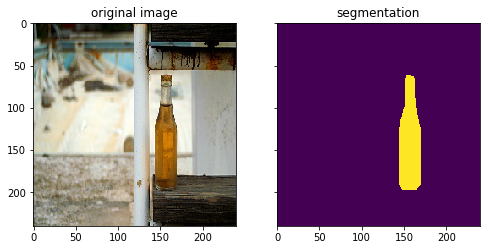

In [31]:
with open('../train.txt') as f:
    image_path, label_path = f.readline().split()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex='all', sharey='all')
    ax1.imshow(mpimg.imread(image_path))
    ax1.set_title('original image')
    ax2.imshow(mpimg.imread(label_path))
    ax2.set_title('segmentation')

In [32]:
with open('../test.txt', 'w') as f:
    for file in tqdm(test):
        x = os.path.join(voc_img_folder, f'{file}.jpg')
        y = os.path.join(voc_seg_folder, f'{file}.png')
        
        assert os.path.exists(x), x
        assert os.path.exists(y), y
        
        image_raw = cv2.imread(x)
        label_raw = cv2.imread(y)
        
        h, w = label_raw.shape[:2]
        label = np.zeros((h, w, 1))
        for i in range(h):
            for j in range(w):
                label[i, j, 0] = encode(label_raw[i, j])
                
        label = cv2.resize(label, (240, 240), interpolation=cv2.INTER_NEAREST)
        image = cv2.resize(image_raw, (240, 240), interpolation=cv2.INTER_NEAREST)
        
        x = f'../test/{file}.jpg'
        y = f'../test/{file}.png'
        
        cv2.imwrite(x, image)
        cv2.imwrite(y, label)
        
        f.write(f'{x} {y}\n')

100%|██████████| 585/585 [17:35<00:00,  1.81s/it]


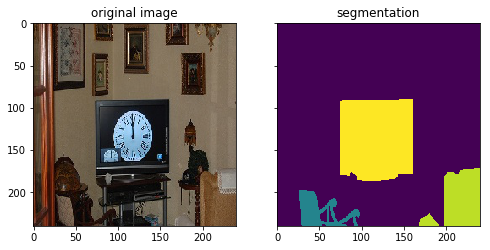

In [33]:
with open('../test.txt') as f:
    image_path, label_path = f.readline().split()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex='all', sharey='all')
    ax1.imshow(mpimg.imread(image_path))
    ax1.set_title('original image')
    ax2.imshow(mpimg.imread(label_path))
    ax2.set_title('segmentation')